<a href="https://colab.research.google.com/github/saptaksubhra/Regression-ML-Retail-Sales-Prediction-Rossmann/blob/main/Rossmann_Sales_Prediction_Final_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting Sales of a Major Store Chain of Rossmann</u></b>

## <b> Problem Statement</b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Table of Contents

1.Import Required Packages

2.Data Preparation

2.1 Loading Dataset

2.2 Sales Dataset of Rossmann

2.2.1 Date Extraction

2.3 Stores Dataset Rossmann

2.4 Dealing With Missing Values ( Feature Engineering )

2.4.1 Counting of missing values

2.5 Numerical Features

2.6 Handling Outliers ( Feature Engineering )

2.6.1 Distribution of Sales

2.6.2 Distribution of Customers

3.Exploratory Data Exploration (EDA) ( Sales Dataset / Stores Dataset )

3.1 Hypothesis

3.2 Sales vs StoreType

3.3 Sales vs Assortment

3.4 Sales vs Promo

3.5 Customers vs Promo

3.6 Sales vs StateHoliday

3.7 Customers vs StateHoliday

3.8 Sales vs SchoolHoliday

3.9 Customers vs SchoolHoliday

3.10 The Effect of Weekdays

3.10.1 DayOfWeek vs Sales

3.10.2 DayOfWeek vs Customers

3.10.3 Average Sales Per Day Of The Week

3.10.4 Average Customers Per Day Of The Week

3.11 Sales Per Year

3.12 Sales And Customers Per Month

3.12.1 Average Sales Per Month

3.12.2 Average Customers Per Month

3.13 Sales And Customers Per Day

3.13.1 Average Sales Per Day

3.13.2 Average Customers Per Day

4.Merging  Datasets

4.1 EDA Of Merged Dataset

4.1.1 The Effect of StateHoliday and SchoolHoliday on Sales

4.1.2 The Effect of CompetitionOpenSinceMonth on Sales

4.1.3 The Effect of Promo2 on Sales and Customers

4.1.4 Sales Per Year

4.1.5 Sales Per Month

4.1.6 Sales Per Week Of Year

4.1.7 Sales Per Day

4.1.8 Sales vs Promo

4.1.9 Customers vs Promo

4.1.10 Sales vs StoreType

4.1.11 Sales vs Assortment

5.Feature Selection of Regression Model

5.1 Assumptions in Regression

5.1.1 Linearity

5.1.2 Sales vs Store

5.1.3 Sales vs Customers

5.1.4 Sales vs CompetitionDistance

5.2 Correlation and Multicollinearity

5.3 One Hot Encoding

5.4 Correlation Heatmap

5.4.1 Selection Of Independent Variables

5.4.2 Final Selection Of Independent Variables

6.Model Building

6.1 Train Test Split

6.2 Linear Regression

6.2.1 Mean of Reiduals

6.2.2 Checking of Normality of Error Terms or Residuals

6.2.3 Cross Validation

6.3 Regularized Regresion With HyperParameter Tunning

6.4 LASSO Regression or L1 Regularization

6.5 Ridge Regression or L2 Regularization

6.6 Elastic Net Regression

6.7 Decision Tree Regressor

6.8 Random Forest Regressor

6.9 XGBoost Regressor

6.10 AdaBoost Regressor

6.11 GradientBoost Regressor

7.Importance Of Features

8.Calculation of Train Score and Test Score

9.Conclusion

10.References

# 1.Importing Required Packages

In [1]:
# Importing important troop of soldiers as libraries and modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
# For Preprocessing of dataset
# We need to import preprocessing from sklearn.
from sklearn.preprocessing import StandardScaler

# This import is to build machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

# Modeling Helpers for selection of models
from sklearn.model_selection import train_test_split

# For evaluation of metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2
import math

Important libraries have been imported for the time being. More libraries will be imported as we proceed further and deep dive into the analysis of datasets and as far as the requirement is concerned.

# 2.Data Preparation
# 2.1 Loading Dataset

In [3]:
# Mounting Google Drive to access the datasets of Rossmann Stores

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Loading data from Rossmann csv file and converting into Pandas dataframe

df_sales_Rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Regression ML Project-Retail Sales Prediction-Rossmann-Saptaksubhra Bhattacharyya/Rossmann Stores Data.csv')
df_stores_Rossmann = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Regression ML Project-Retail Sales Prediction-Rossmann-Saptaksubhra Bhattacharyya/store.csv')

# 2.2 Sales Dataset of Rossmann

In [5]:
# First of all, let's have a look at the ins and out of sales dataset of Rossmann
# First five rows of sales dataset of Rossmann
df_sales_Rossmann.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [6]:
# Last five rows of the sales dataset of Rossmann
df_sales_Rossmann.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [7]:
# Number of rows and columns in sales dataset of Rossmann

df_sales_Rossmann.shape

(1017209, 9)

In [8]:
# Now the information in detail of sales dataset of Rossmann

df_sales_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
# Let's get the statistical information of sales dataset of Rossmann.

df_sales_Rossmann.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [10]:
# Let's check number of unique values of 'DayOfWeek' column in Rossmann sales dataset.
df_sales_Rossmann['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [11]:
df_sales_Rossmann['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [12]:
# Number of unique values in 'Open' column in Sales dataset of Rossmann.
df_sales_Rossmann['Open'].unique()

array([1, 0])

In [13]:
# Printing the values of the below mentioned columns.

print('Open : \n', df_sales_Rossmann['Open'].value_counts())
print('\n')
print('Promo : \n', df_sales_Rossmann['Promo'].value_counts())
print('\n')
print('StateHoliday : \n', df_sales_Rossmann['StateHoliday'].value_counts())
print('\n')
print('SchoolHoliday : \n', df_sales_Rossmann['SchoolHoliday'].value_counts())

Open : 
 1    844392
0    172817
Name: Open, dtype: int64


Promo : 
 0    629129
1    388080
Name: Promo, dtype: int64


StateHoliday : 
 0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64


SchoolHoliday : 
 0    835488
1    181721
Name: SchoolHoliday, dtype: int64


It is being oberved that something odd happened in 'StateHoliday' column. Let's become another Sherlock to investigate that mystery.

In [14]:
# Let's check number of unique values in 'StateHoliday' column of Rossmann Sales dataset.

df_sales_Rossmann['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [15]:
# Let's apply lambda anonymous function on 'StateHoliday' column to sort this problem.

df_sales_Rossmann['StateHoliday'] = df_sales_Rossmann['StateHoliday'].apply(lambda x:0 if x == 0 else x)
df_sales_Rossmann['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

Let's check how many stores are open and closed during state holidays. Let's make a groupby of 'StateHoliday' and 'Open' columns to make a new dataframe for the sake of analysis.

In [16]:
# Grouping by 'StateHoliday' and 'Open' columns.

df_sales_Rossmann_new = df_sales_Rossmann.groupby(['StateHoliday', 'Open'])

In [17]:
# Number of stores open and closed during state holidays.

df_sales_Rossmann_new['Open'].value_counts().to_frame()

Open
StateHoliday Open Open        
0            0    0      18932
             1    1     112140
             0    0     123745
             1    1     731342
a            0    0      19566
             1    1        694
b            0    0       6545
             1    1        145
c            0    0       4029
             1    1         71

In [18]:
# Let's sum up the total number of sales of the stores which were opened during state holidays.

df1 = df_sales_Rossmann_new['Open', 'Sales'].sum()
df1

Open       Sales
StateHoliday Open                    
0            0          0           0
             1     112140   751505326
             0          0           0
             1     731342  5113659442
a            0          0           0
             1        694     5890305
b            0          0           0
             1        145     1433744
c            0          0           0
             1         71      691806

In [19]:
df2 = df1[df1['Open'] != 0]
df2

Open       Sales
StateHoliday Open                    
0            1     112140   751505326
             1     731342  5113659442
a            1        694     5890305
b            1        145     1433744
c            1         71      691806

In [20]:
# Let's count the total sales of stores which were opened during state holidays.

sales1 = df2['Sales'].sum()

In [21]:
# Now let's check the total sales in case of the original sales dataset of Rossmann.

sales2 = df_sales_Rossmann['Sales'].sum()

In [22]:
# Now, let's print value of both 'sales1' and 'sales2' to see whether the total sales are same or not in terms of both datasets.

print(sales1)
print('\n')
print(sales2)

5873180623


5873180623


# Observations:

* From the above result, it is obvious that the total sales in both scenarios is same. 
* Also, there are four types of StateHoliday, such as : type a, type b, type c, type d.


Now, let's estimate the percentage of sales for these above mentioned three types of StateHoliday.

In [23]:
# Calculation of percentage of sales of three different types of StateHoliday.
# Now, 'sales1' has been taken as total sales as it's been already estimated.

sales_a = ((5890305) / sales1)*100  # Percentage of sales of type a StateHoliday
sales_b = ((1433744) / sales1)*100  # Percentage of sales of type b StateHoliday
sales_c = ((691806) / sales1)*100   # Percentage of sales type c StateHoliday

sales_a, sales_b, sales_c



(0.10029156905089788, 0.024411713039869845, 0.011779069032728436)

# Observations:

* From those above results, it is visible that sales of type b of state holiday is doulble than that of the sales of type c of state holiday and sales of type a of state holiday is a little more than 4 times of the sales of type b of state holiday. 
* But, if we come to the share of sale in terms of percentage of type a, b, and c then , there is no siginificant difference in comparison with themselves and with sales. Therefore, those different types of stateholidays ( type a, b, c) can be treated as the same. So, those three types can be replaced by 1 only.

The 'StateHoliday' column is converted into Boolean variable. The value of type a, b , c converted into 1 and others into 0.

In [24]:
# Conversion of 'StateHoliday' column into boolean variable.

df_sales_Rossmann.StateHoliday.replace({'0': 0, 'a': 1, 'b': 1, 'c' : 1}, inplace = True)

In [25]:
# Printing values of 'StateHoliday' column

print('StateHoliday : \n', df_sales_Rossmann['StateHoliday'].value_counts())

StateHoliday : 
 0    986159
1     31050
Name: StateHoliday, dtype: int64


In [26]:
# Now, let's count number of unique values of 'SchoolHoliday' column.

df_sales_Rossmann['SchoolHoliday'].unique()

array([1, 0])

In [27]:
# Checking datatypes of sales dataset of Rossmann

df_sales_Rossmann.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday      int64
SchoolHoliday     int64
dtype: object

In [28]:
# Checking datatypes of stores dataset of Rossmann

df_stores_Rossmann.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

# Observations:

* From the above two tables, it is evident that Date,StateHoliday,Storetype,Assortment,PromoInterval are of object datatype. But, in ML algorithms work nicely with numerical data.
* Therefore, these object datatypes will be converted into numerical by converting into Boolean variable as per requirements.

# 2.2.1 Date Extraction:

Now, we need to extract day, month, year, week, quarter, week of year from 'Date' column. Then, let's do it.

In [29]:
# Converting 'Date' column into datetime first.
df_sales_Rossmann['Date'] = pd.to_datetime(df_sales_Rossmann['Date'])

In [30]:
# Extracting day, month, year, week, quarter, week of year from 'Date' column. 

df_sales_Rossmann['Year'] = df_sales_Rossmann['Date'].dt.year
df_sales_Rossmann['Month'] = df_sales_Rossmann['Date'].dt.month
df_sales_Rossmann['Day'] = df_sales_Rossmann['Date'].dt.day
df_sales_Rossmann['Week'] = df_sales_Rossmann['Date'].dt.week%4
df_sales_Rossmann['WeekOfYear'] = df_sales_Rossmann['Date'].dt.week 
df_sales_Rossmann['Quarter'] = df_sales_Rossmann['Date'].dt.quarter

Now, 'Date' column can be deleted as this column has been subdivided into several columns in the above section for deeper analysis. Therfore, there is no need of 'Date' column.

In [31]:
# Erasing 'Date' column from sales dataset of Rossmann

del df_sales_Rossmann['Date']

In [32]:
# Now, the new form of sales dataframe

df_sales_Rossmann.head()

Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5   5263        555     1      1             0   
1      2          5   6064        625     1      1             0   
2      3          5   8314        821     1      1             0   
3      4          5  13995       1498     1      1             0   
4      5          5   4822        559     1      1             0   

   SchoolHoliday  Year  Month  Day  Week  WeekOfYear  Quarter  
0              1  2015      7   31     3          31        3  
1              1  2015      7   31     3          31        3  
2              1  2015      7   31     3          31        3  
3              1  2015      7   31     3          31        3  
4              1  2015      7   31     3          31        3

# 2.3 Stores Dataset of Rossmann

In [33]:
# And next is stores dataset of Rossmann
# First five rows of stores dataset of Rossmann
df_stores_Rossmann.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [34]:
# Last five rows of stores dataset of Rossmann
df_stores_Rossmann.tail()

Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

In [35]:
# Number of rows and columns of stores dataset of Rossmann

df_stores_Rossmann.shape

(1115, 10)

In [36]:
# Now the information in detail of stores dataset of Rossmann

df_stores_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [37]:
# Let's have the statistical information of stores dataset of Rossmann.

df_stores_Rossmann.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

Distance from the nearest competitor is never equal to 0. The  minimum value is 20 and maximum value is 75860. The minimum value is 1900 at the opening time of a competitor's store  and that is an error. For continuous promotions conducted in stores, the mean is 0.5, and only half of them have been promoted.

In [38]:
# Number of unique values in 'CompetitionOpenSinceYear' in stores dataset of Rossmann.

df_stores_Rossmann['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [39]:
# Number of values in 'CompetitionOpenSinceYear' in stores dataset of Rossmann.

df_stores_Rossmann['CompetitionOpenSinceYear'].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

From the above result, it is evident that most of the opening years of competitive stores are in between 1990 and 2014 except 1900 and 1961 which can be considered as outliers.

In [40]:
# Let's replace years 1900 and 1961 with mode value in "CompetitionOpenSinceYear" column.

df_stores_Rossmann.CompetitionOpenSinceYear.replace(1900, int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0]), inplace = True)
df_stores_Rossmann.CompetitionOpenSinceYear.replace(1961, int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0]), inplace = True)


In [41]:
# The mode value of 1900 and 1961 in 'CompetitionOpenSinceYear' column of stores dataset of Rossmann.

int(df_stores_Rossmann.CompetitionOpenSinceYear.mode()[0])

2013

# 2.4 Dealing With Missing Values ( Feature Engineering )

# 2.4.1 Counting of Missing Values 

Handling missing values is also being a crucial part of data cleaning process. To deal with these missing values let's revisualize stores dataset  and sales dataset of Rossmann. And the ins and outs will be visible.

In [42]:
df_sales_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1017209 non-null  int64
 1   DayOfWeek      1017209 non-null  int64
 2   Sales          1017209 non-null  int64
 3   Customers      1017209 non-null  int64
 4   Open           1017209 non-null  int64
 5   Promo          1017209 non-null  int64
 6   StateHoliday   1017209 non-null  int64
 7   SchoolHoliday  1017209 non-null  int64
 8   Year           1017209 non-null  int64
 9   Month          1017209 non-null  int64
 10  Day            1017209 non-null  int64
 11  Week           1017209 non-null  int64
 12  WeekOfYear     1017209 non-null  int64
 13  Quarter        1017209 non-null  int64
dtypes: int64(14)
memory usage: 108.6 MB


From this information, it can be clearly said that there are no missing values available in sales dataset of Rossmann as number of non-null values are equal in each and every column of that particular dataset and total number of entries is exactly the same as in case of each and every column of the sales dataset. Let's see what the stores dataset talks about.

In [43]:
df_stores_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In stores dataset, the total number of entries is 1115 and it is not equal for each and every column present in that dataset. So, undoubtedy there are missing values in those columns which have less entries than 1115. Those columns are 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval'. Let's revisualize number of missing values in both datasets.

In [44]:
# Printing missing values of each dataset ( Sales dataset and stores dataset)

print('Missing values in sales dataset:\n', df_sales_Rossmann.isnull().sum())
print('\n')
print('Missing values in stores dataset:\n',df_stores_Rossmann.isnull().sum())

Missing values in sales dataset:
 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
Week             0
WeekOfYear       0
Quarter          0
dtype: int64


Missing values in stores dataset:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


It is evident that missing values are only in stores dataset. This isnull() operation has been performed to reassure the existence of missing values in a dataset. This also helps identify missing values more accurately. Handling missing values is also a very important aspect as far as the efficiency of machine learning models are concerned. If machine learning models do not work well due to the existence of missing values then it could lead to erroneous output which will in turn would be fatal to the decision-making of company in future investments and realistic approaches.

Let's get back to business to handle those missing values first and foremost in stores dataset.

In [46]:
# Handling missing values of stores dataset.

df_stores_Rossmann['CompetitionDistance'] = df_stores_Rossmann['CompetitionDistance'].fillna(df_stores_Rossmann['CompetitionDistance'].median())
df_stores_Rossmann['CompetitionOpenSinceMonth'] = df_stores_Rossmann['CompetitionOpenSinceMonth'].fillna(df_stores_Rossmann['CompetitionOpenSinceMonth'].mode()[0])
df_stores_Rossmann['CompetitionOpenSinceYear'] = df_stores_Rossmann['CompetitionOpenSinceYear'].fillna(df_stores_Rossmann['CompetitionOpenSinceYear'].mode()[0])
df_stores_Rossmann.Promo2SinceWeek.fillna(0, inplace = True)
df_stores_Rossmann.Promo2SinceYear.fillna(0, inplace = True)
df_stores_Rossmann.PromoInterval.fillna(0, inplace = True)

Let's check whether I have been able to replace those null values or not.

In [47]:
# Checking the existence of null values in stores dataset.

df_stores_Rossmann.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Let's look at few number of entries of stores dataset of Rossmann.

In [48]:
# Looking at n number of entries of stores dataset of Rossmann ( Here n = 16).

df_stores_Rossmann.sample(16)

Store StoreType Assortment  CompetitionDistance  \
535     536         a          c               4700.0   
787     788         a          c               1530.0   
538     539         a          a                770.0   
189     190         a          a               1470.0   
85       86         a          a                480.0   
300     301         a          c               4510.0   
503     504         c          c                820.0   
1113   1114         a          c                870.0   
1082   1083         d          c              11540.0   
298     299         d          c              38630.0   
687     688         a          a              18760.0   
1091   1092         a          a                300.0   
166     167         a          a                140.0   
666     667         d          c               2870.0   
748     749         a          a               3410.0   
629     630         a          a               1690.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
535                         9.0                    2002.0       1   
787                         3.0                    2013.0       0   
538                         5.0                    2013.0       1   
189                        12.0                    2006.0       1   
85                          2.0                    2005.0       1   
300                         3.0                    2015.0       0   
503                         9.0                    2013.0       0   
1113                        9.0                    2013.0       0   
1082                        9.0                    2013.0       1   
298                         9.0                    2012.0       0   
687                         8.0                    2015.0       1   
1091                        7.0                    2000.0       1   
166                         4.0                    2008.0       0   
666                         9.0                    2012.0       0   
748                         8.0                    2011.0       1   
629                         4.0                    2015.0       0   

      Promo2SinceWeek  Promo2SinceYear    PromoInterval  
535              31.0           2013.0  Feb,May,Aug,Nov  
787               0.0              0.0                0  
538              40.0           2014.0  Jan,Apr,Jul,Oct  
189              40.0           2014.0  Jan,Apr,Jul,Oct  
85               31.0           2013.0  Jan,Apr,Jul,Oct  
300               0.0              0.0                0  
503               0.0              0.0                0  
1113              0.0              0.0                0  
1082              5.0           2013.0  Feb,May,Aug,Nov  
298               0.0              0.0                0  
687              14.0           2011.0  Jan,Apr,Jul,Oct  
1091             40.0           2014.0  Jan,Apr,Jul,Oct  
166               0.0              0.0                0  
666               0.0              0.0                0  
748              14.0           2015.0  Jan,Apr,Jul,Oct  
629               0.0              0.0                0

Let's check whether any duplicate value exist or not in both datasets ( sales dataset and stores dataset )


In [49]:
# Checking duplicate values of sales dataset 

dup_sales = df_sales_Rossmann.duplicated()
dup_sales.sum()

0

In [50]:
# Checking duplicate values of stores dataset

dup_stores = df_stores_Rossmann.duplicated()
dup_stores.sum()

0

It is quite clear that there is no existence of duplicate values in both datasets.

# 2.5 Numerical Features

Let's investigate how many number of numerical values are available in both sales and stores datasets.

In [51]:
# Checking total number of numerical values in sales dataset of Rossmann.

numerical_features_sales = [feature for feature in df_sales_Rossmann.columns if df_sales_Rossmann[feature].dtypes != 0]
print('Total number of numerical values in sales dataset of Rossmann is : ', len(numerical_features_sales))
print('\n')

df_sales_Rossmann[numerical_features_sales].head()

Total number of numerical values in sales dataset of Rossmann is :  14




Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5   5263        555     1      1             0   
1      2          5   6064        625     1      1             0   
2      3          5   8314        821     1      1             0   
3      4          5  13995       1498     1      1             0   
4      5          5   4822        559     1      1             0   

   SchoolHoliday  Year  Month  Day  Week  WeekOfYear  Quarter  
0              1  2015      7   31     3          31        3  
1              1  2015      7   31     3          31        3  
2              1  2015      7   31     3          31        3  
3              1  2015      7   31     3          31        3  
4              1  2015      7   31     3          31        3

In [52]:

# Checking total number of numerical values in stores dataset of Rossmann

numerical_features_stores = [feature for feature in df_stores_Rossmann.columns if df_stores_Rossmann[feature].dtypes != 0]
print("Total number of numerical values in stores dataset of Rossmann is : ", len(numerical_features_stores))
print('\n')
df_stores_Rossmann[numerical_features_stores].head()

Total number of numerical values in stores dataset of Rossmann is :  10




Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              0.0              0.0   
4                    2015.0       0              0.0              0.0   

     PromoInterval  
0                0  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3                0  
4                0


# 2.6 Handling Outliers ( Feature Engineering )

To handle outliers, we should start up with target variable i,e. 'Sales' column as it is the most important column as far as the sales prediction is concerned. Numerical features like 'Customers', 'CompetitionDistance' and many more will be explored. This sales dataset has some values which look like outliers. So, we need to check if there are outliers in the sales dataset and if outliers exist, those will be removed.

In [53]:
# Checking total number of zeros in 'Sales' column of sales dataset

(df_sales_Rossmann['Sales'] == 0).sum()


172871

As it can be seen that there are huge number of zeros in the 'Sales' column of sales dataset so only non-zero values will be stored in 'Sales' column.

In [54]:
# Storing up non-zero values in 'Sales' column of sales dataset

df_sales_Rossmann = df_sales_Rossmann[df_sales_Rossmann.Sales != 0]

# 2.6.1 Distribution of Sales

Let's do the distribution plot of target variable 'Sales' so that the distribution of sales can be visualized.

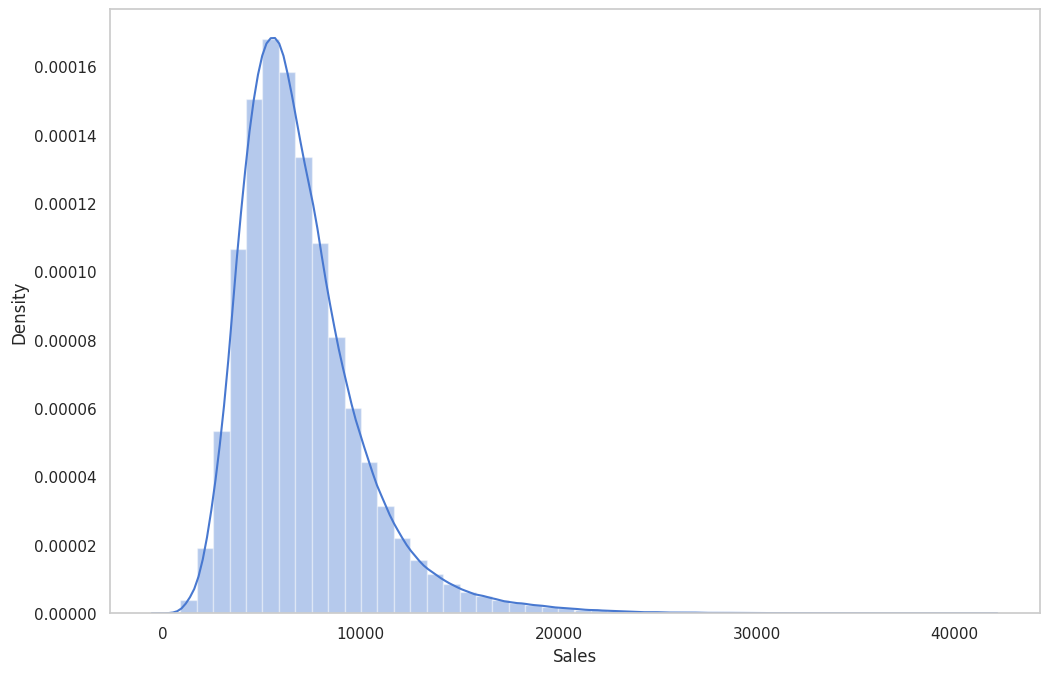

In [55]:
# The distribution of target variable 'Sales'

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Sales'])
axi.grid(False)

# Observation: 

From the above distribution plot, it can be observed that 'Sales' column is almost normally distributed. To make it a perfect normal distribution, square root of moderate skew has been perfomed.

In [57]:
# Now performing square root of moderate skew to have a perfect normal distribution of sales

df_sales_Rossmann['Sales'] = np.sqrt(df_sales_Rossmann['Sales'])

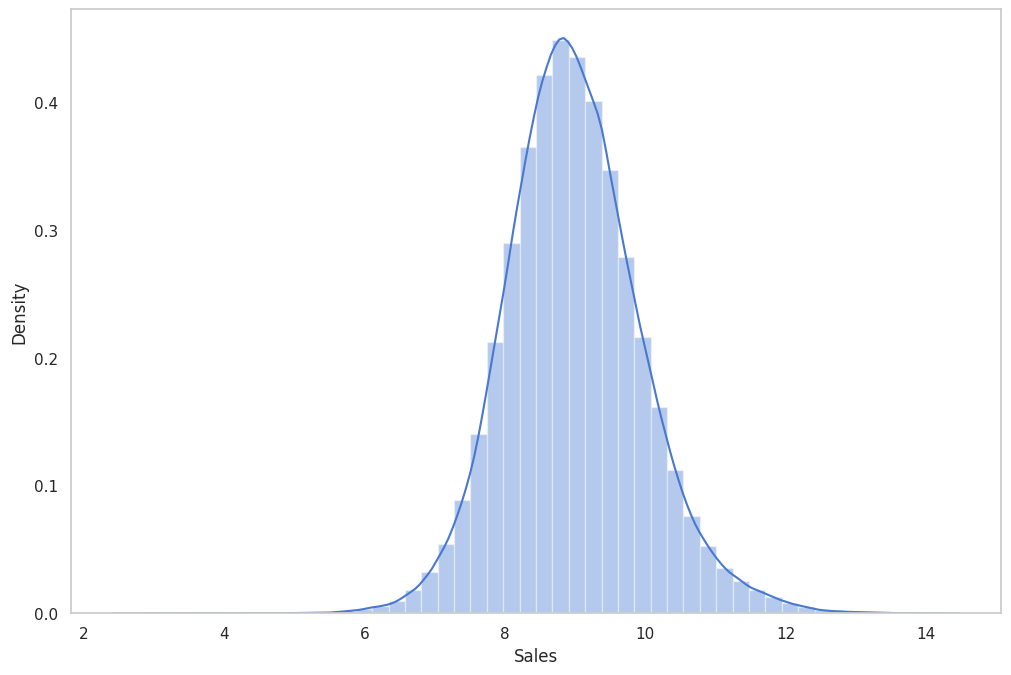

In [58]:
# Let's visualize now through distribution plot.

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Sales'])
axi.grid(False)

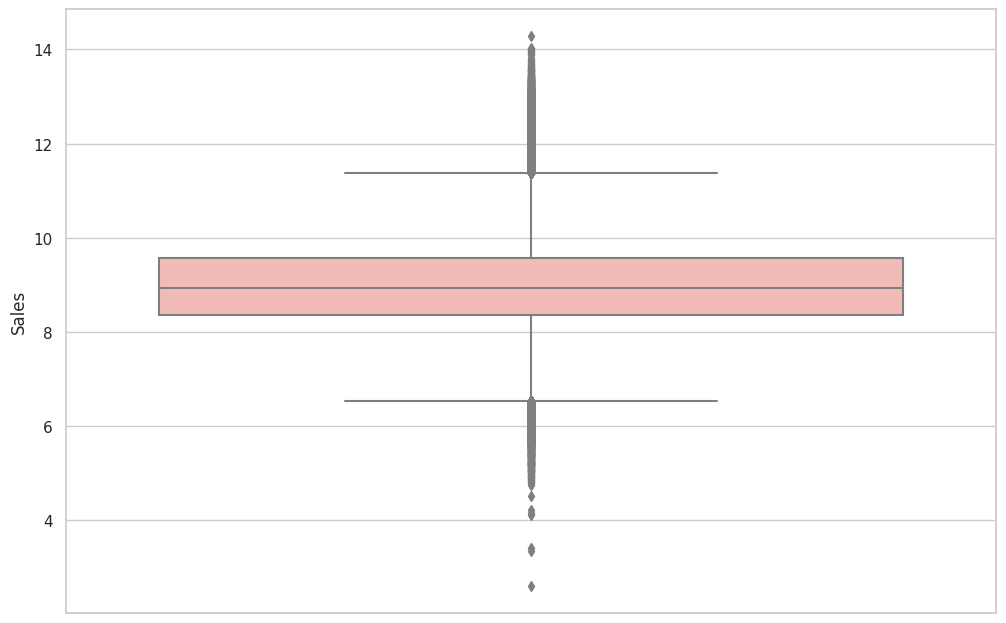

In [59]:
# Now, let's see the boxplot for the same distribution of sales.

sns.set_style('whitegrid')
sns.boxplot(y = df_sales_Rossmann['Sales'], palette = 'Pastel1')
plt.show()

# Observation:

From the above box plot, it is evident that there are definitely outliers existing in 'Sales' column of sales dataset. Let's remove those first from 'Sales' column.

In [60]:
#Calculation of lower bound, uuper bound, IQR, Q1 and Q3

Q1 = np.percentile(df_sales_Rossmann['Sales'], 25)
Q3 = np.percentile(df_sales_Rossmann['Sales'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [61]:
# Removal of outliers from target variable

df_sales_Rossmann.drop(index = df_sales_Rossmann[df_sales_Rossmann['Sales'] > upper_bound].index, axis = 0, inplace = True)
df_sales_Rossmann.drop(index = df_sales_Rossmann[df_sales_Rossmann['Sales'] < lower_bound].index, axis = 0, inplace = True)

As the outliers have been removed from the target variable so let's do the boxolot now to see the distribution of target variable 'Sales'.

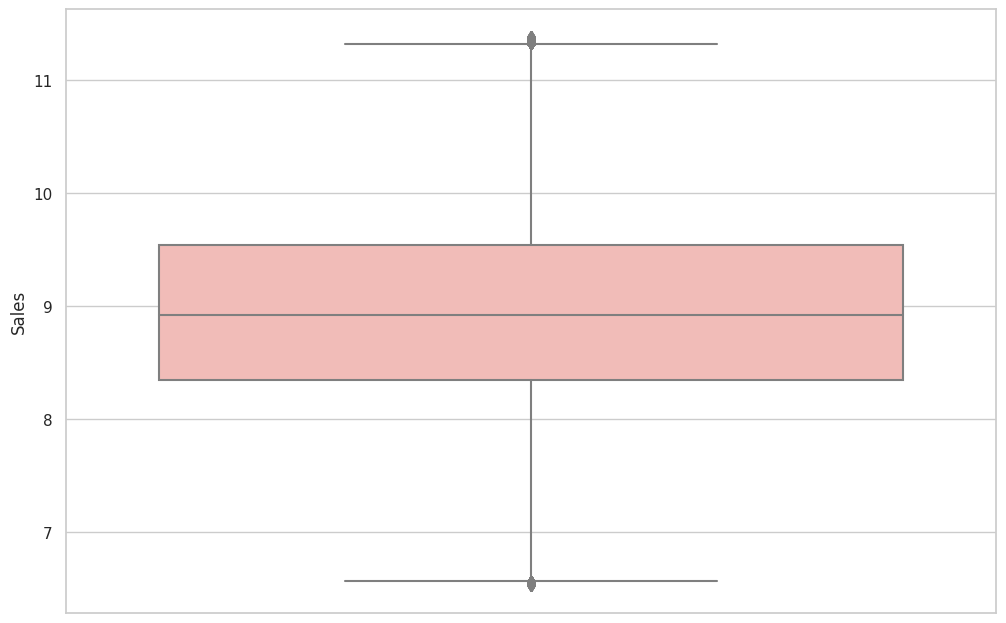

In [62]:
# Plotting the boxplot of target variable.

sns.set_style('whitegrid')
sns.boxplot(y = df_sales_Rossmann['Sales'], palette = 'Pastel1')
plt.show()

# Observation:

From the above boxplot, it is visible that those ouliers have really been the outcast of the boxplot society and that will in turn reflect in terms of better accuracy as far as the distribution of target variable is concerned.

# 2.6.2 Distribution of Customers

Let's see what the distribution of customers convey through data visualization. Let's plot distribution plot to see the distribution of customers elaboratively.

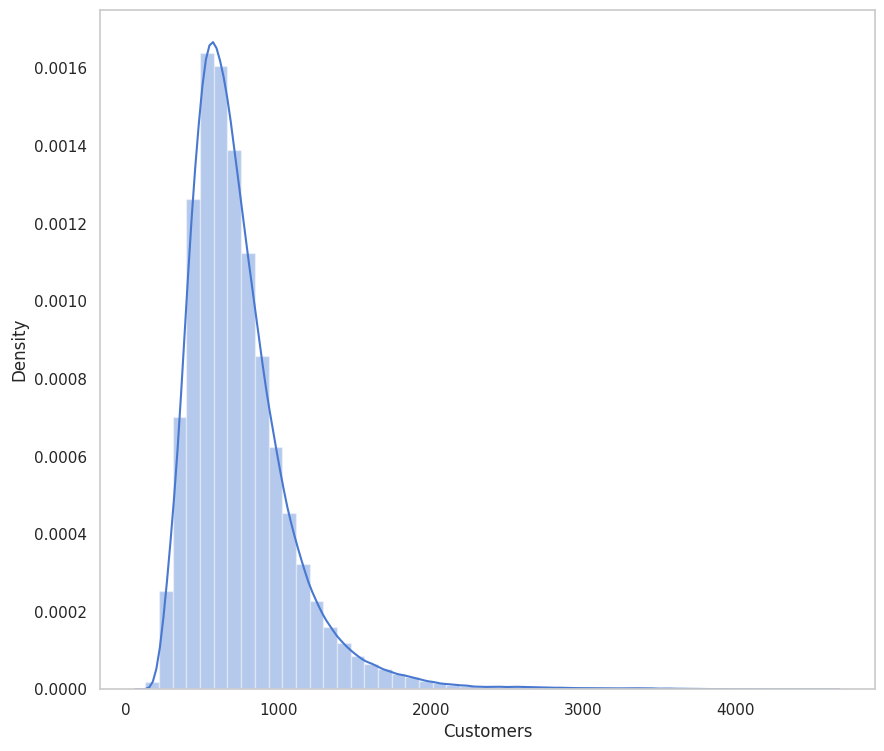

In [63]:


# Distribution of customers

sns.set_theme( rc = {'figure.figsize' : (10,9)}, style = 'whitegrid', palette = 'muted')
axe = sns.distplot(df_sales_Rossmann['Customers'])
axe.grid(False)

# Observation:

From the above distribution plot, it can be observed that 'Customers' column is almost normally distributed. To make it a perfect normal distribution, square root of moderate skew has been perfomed.

In [64]:

# Now performing square root of moderate skew to have a perfect normal distribution of customers

df_sales_Rossmann['Customers'] = np.sqrt(df_sales_Rossmann['Customers'])

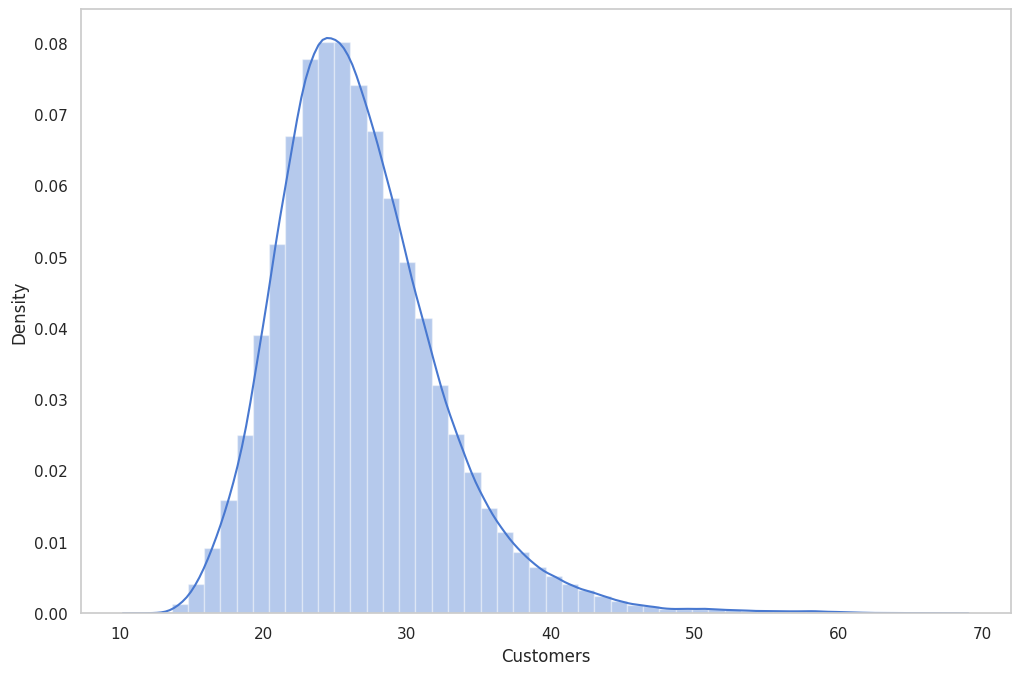

In [65]:
# Let's visualize now through distribution plot.

sns.set_theme(rc = {'figure.figsize' : (12,8)}, style = 'whitegrid', palette = 'muted')
axi = sns.distplot(df_sales_Rossmann['Customers'])
axi.grid(False)


# Observation:

The above distribution plot is almost a perfect example of normal distribution.

# 3. Exploratory Data Exploration ( EDA ) (Sales Dataset / Stores Dataset)

Exploratory data analysis is a crucial part of data analysis. It is an approach of exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Visual techniques are applied. Python libraries like pandas are used to explore the data and matplotlib and seaborn are used to visualize it. It includes analyzing what our dataset consists of. The impact of categorical as well as numerical features have been explored in relation to the output or depenedent variable named 'Sales'.

# 3.1 Hypothesis

Just by observing the head of the dataset and understanding the features involved in it, the following hypothesis could be framed:

* There is a feature named "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably on Sunday when the stores would be closed and beacuse of that we would get low overall sales.

* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to renovation and redecoration or refurbishment, those would generate no revenue for that period of time.
* Stores are influenced by seasonality and as to that there might be a chance that sales would be high prior to holidays.

Let's do some basic EDA. This EDA will be performed both on sales dataset and stores dataset individually depending upon the requirements and these two datasets have not been merged yet. After merging these two datasets, further EDA and train-test split will be performed.

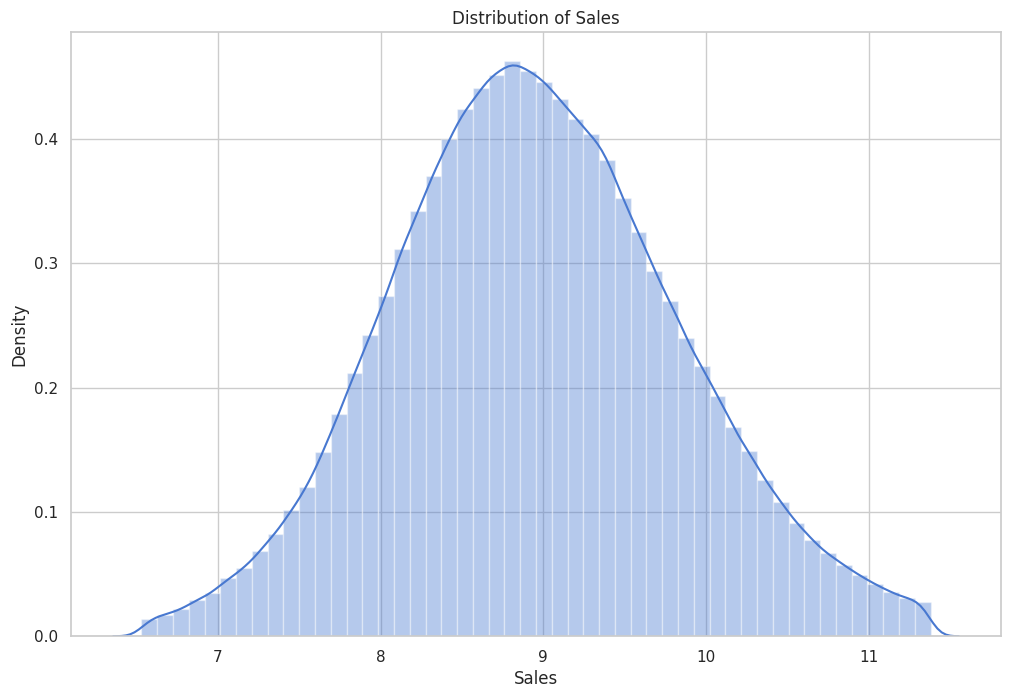

In [66]:
# Distribution of sales 

plt.title('Distribution of Sales')
sns.distplot(df_sales_Rossmann['Sales'])
plt.show()


The distribution plot depicts that the target variable 'Sales' is almost perfectly normally distributed as outliers have been removed in previous section of handling outliers.

# 3.2 Sales vs StoreType

This time around, let's observe what is the impact of StoreType and Assortment on Sales. Two bargraphs will be plotted to see those impact separately.

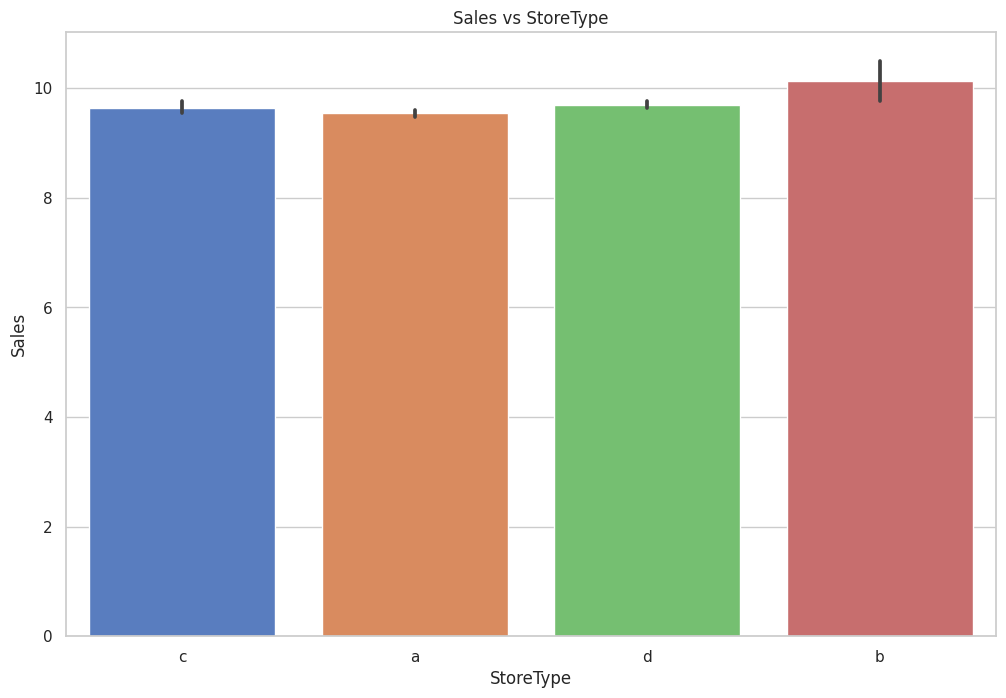

In [67]:
# Now let's see how Sales vs Storetype look like through bar graph.

plt.title('Sales vs StoreType')
sns.barplot(x = df_stores_Rossmann['StoreType'], y = df_sales_Rossmann['Sales'])
plt.show()

# Observations:

* From Sales vs StoreType graph, it is evident that maximum sales belongs to type b store.
* Stores type d and type c share almost the same spot as far as sales is concerned with respect to store type.
* Store type a has minimum sales but not much less than stores type d and type c.

# 3.3 Sales vs Assortment

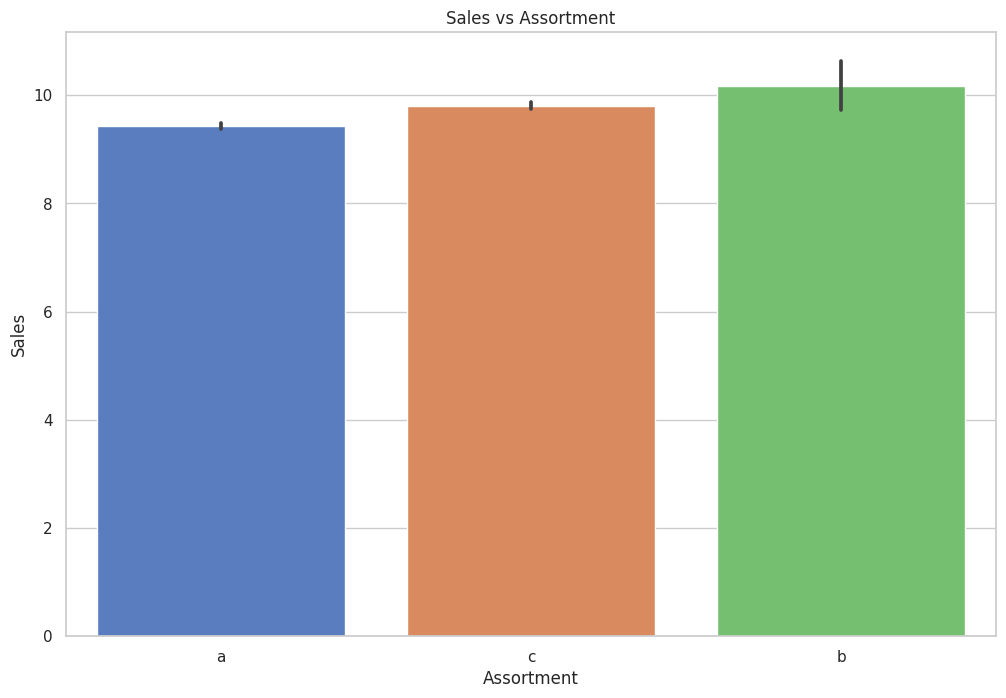

In [68]:
# Bar graph of Sales vs Assortment

sns.barplot(x = df_stores_Rossmann['Assortment'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs Assortment')
plt.show()

# Observations:

* Bargraph of Sales vs Assortment depicts that type b assortment has the maximum sales followed by type c.
* Type a has the minimum sales.

# 3.4 Sales vs Promo

Let's observe what is the impact of Promo on Sales and Customers. Two bargraphs will be plotted to see those impact separately.

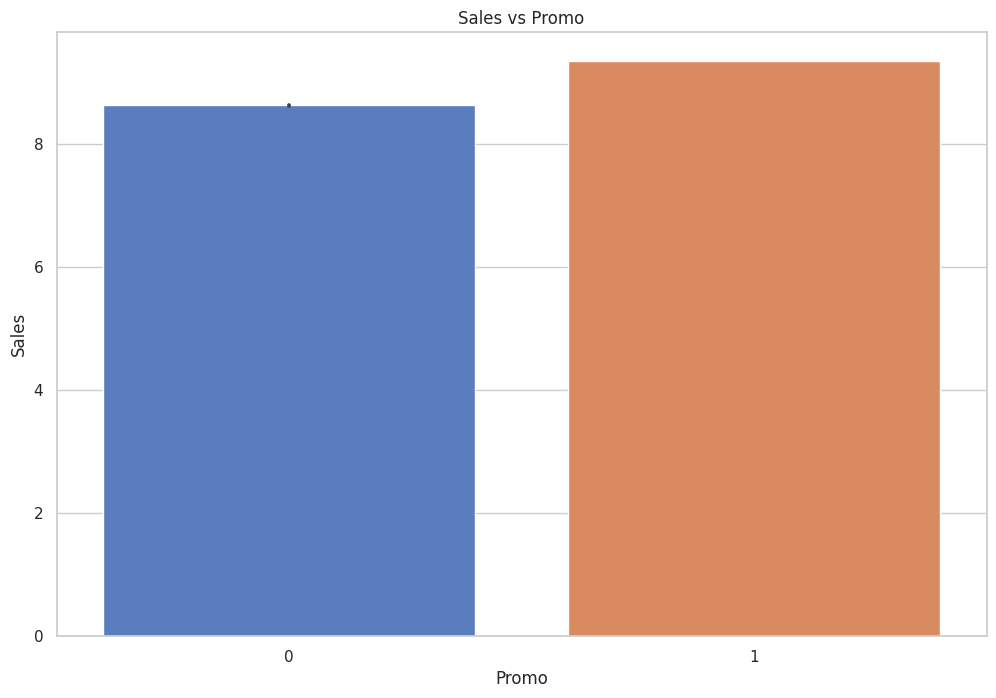

In [69]:
# Bargraph of Sales vs Promo

sns.barplot( x= df_sales_Rossmann['Promo'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs Promo')
plt.show()

# 3.5 Customers vs Promo

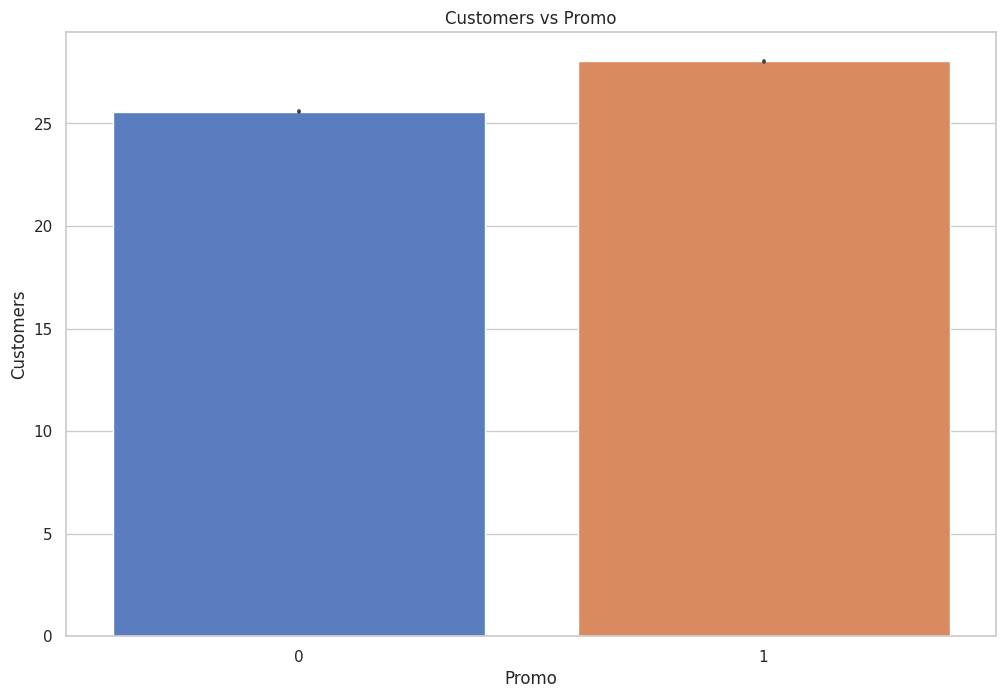

In [70]:
# Bargraph of Customers vs Promo

sns.barplot(x = df_sales_Rossmann['Promo'], y = df_sales_Rossmann['Customers'])
plt.title('Customers vs Promo')
plt.show()

# Observations:

* It can be observed from these two above graphs that the increment of sales and customers do not have a significant role during promotional times. 
* On the contrary, it can be said that Promo does not have that much impact on sales and customers.
* So, whether to implement promo or not on stores, sales and customers stay the same.

# 3.6 Sales vs StateHoliday

Now, let's observe what is the effect or impact of StateHolidays on Sales as well as on Customers. I'll be plotting two bargraphs to visualize those impact separately.

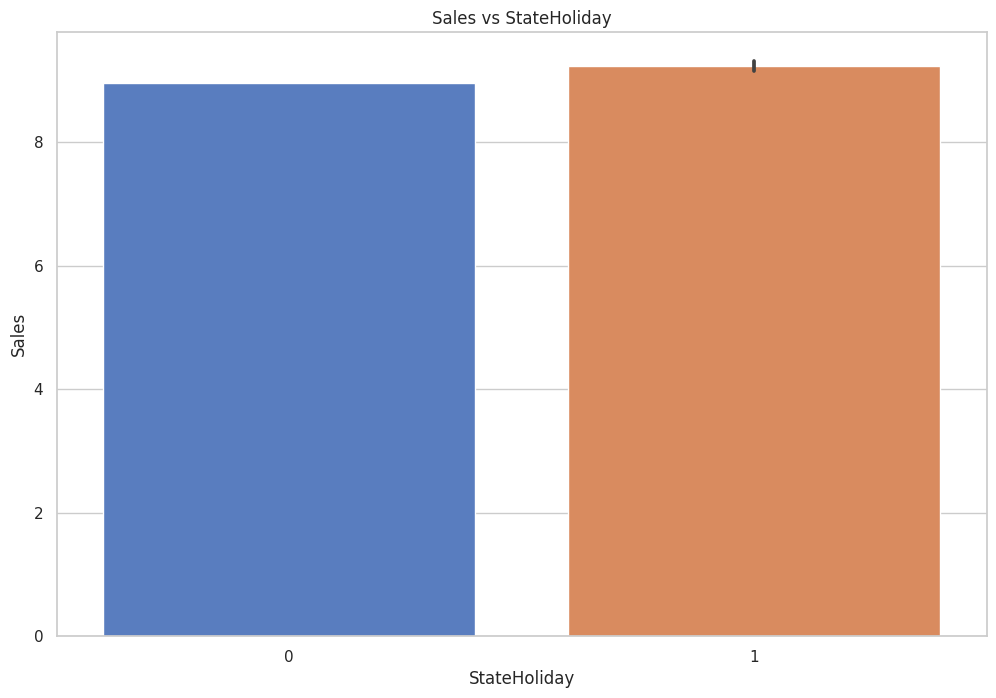

In [71]:
# Bargraph of Sales vs StateHoliday

sns.barplot(x = df_sales_Rossmann['StateHoliday'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs StateHoliday')
plt.show()

# 3.7 Customers vs StateHoliday

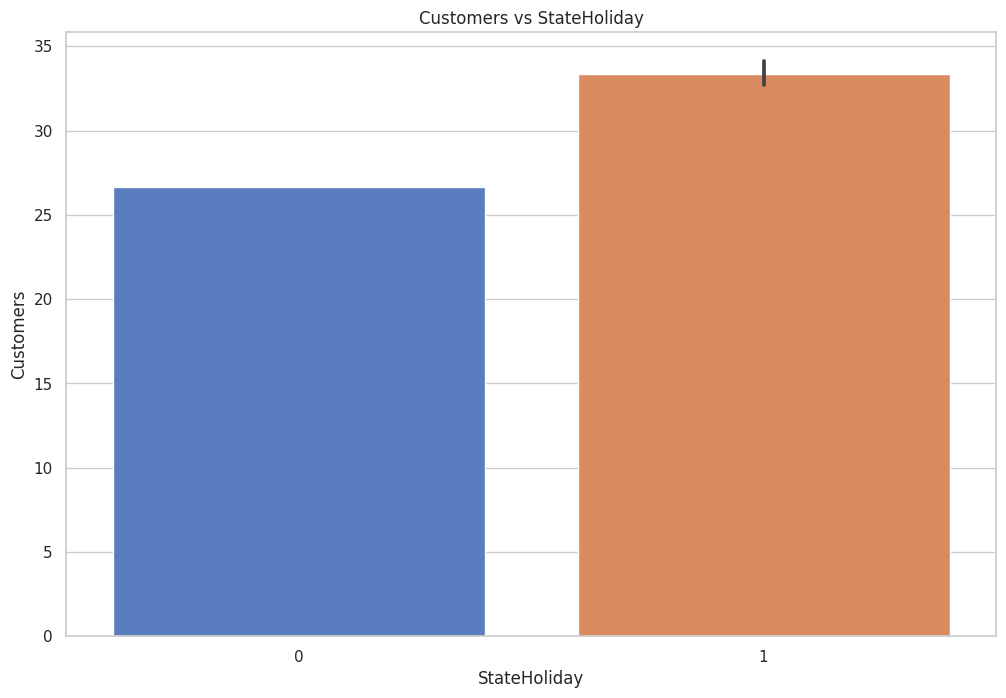

In [72]:
# Bargraph of Customers vs StateHoliday

sns.barplot(x = df_sales_Rossmann['StateHoliday'], y = df_sales_Rossmann['Customers'])
plt.title("Customers vs StateHoliday")
plt.show()

# Observations:

* From the first bargraph of 'Sales vs StateHoliday', it shows that sales does increase during state holidays.
* But the increment in sales during state holidays is not huge and it stays almost the same as in case of without state holidays
* The walk-ins of customers also increases during state holidays as it is evident from second bargraph of 'Customers vs StateHoliday'.
* Customers are directly proportional to state holidays. That means State holidays do have a positive impact on customers but that impact is not huge.

# 3.8 Sales vs SchoolHoliday

Now, the observation is on the effect of SchoolHoliday on Sales and Customers.

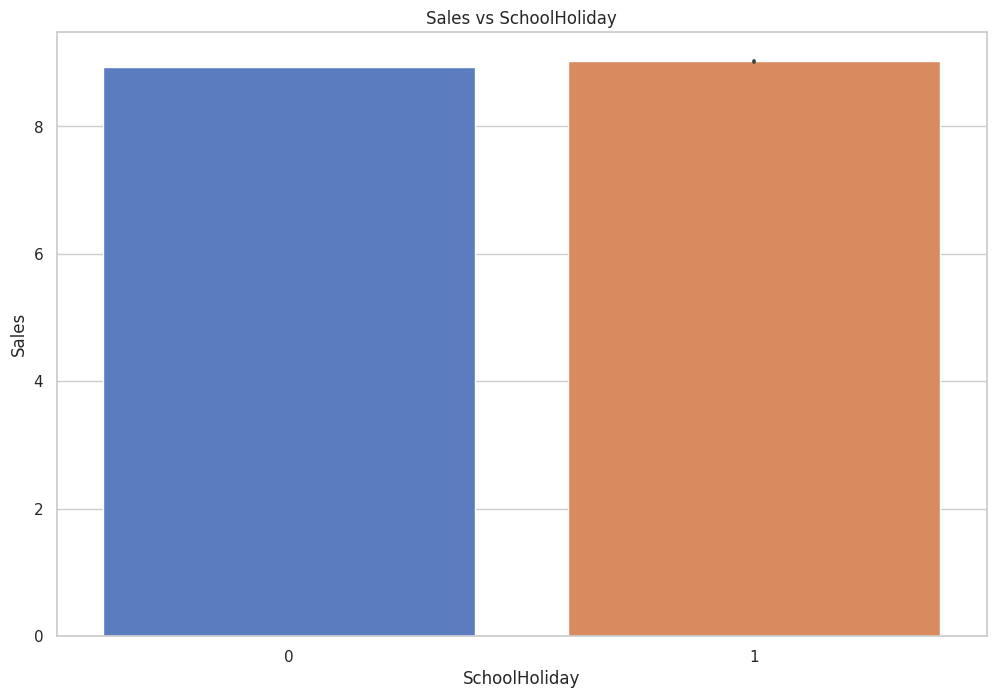

In [73]:
# Bargraph of Sales vs SchoolHoliday

sns.barplot(x = df_sales_Rossmann['SchoolHoliday'], y = df_sales_Rossmann['Sales'])
plt.title('Sales vs SchoolHoliday')
plt.show()

# 3.9 Customers vs SchoolHoliday

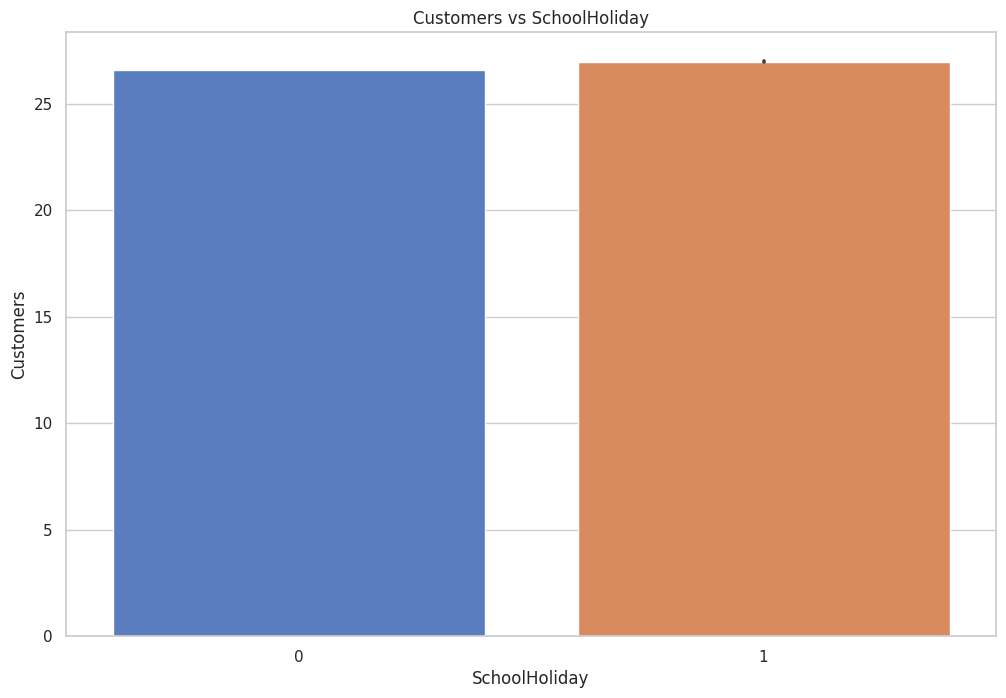

In [74]:
# Bargraph of Customers vs SchoolHoliday

sns.barplot(x = df_sales_Rossmann['SchoolHoliday'], y = df_sales_Rossmann['Customers'])
plt.title("Customers vs SchoolHoliday")
plt.show()

# Observations:

* From the first bargraph of 'Sales vs SchoolHoliday', it shows that the increment in sales is minor during school holidays.
* From the second bargraph of 'Customers vs SchoolHoliday', it shows that the increment in customers' walk-ins is minor during school holidays.
* Both sales and customers almost stay the same during school holidays and do not have that much impact on school holidays.

# 3.10 The Effect Of Weekdays

The effect weekdays is also crucial. So, why not visualize the effect of weekdays in terms of grapical presentations. Let's do it then.

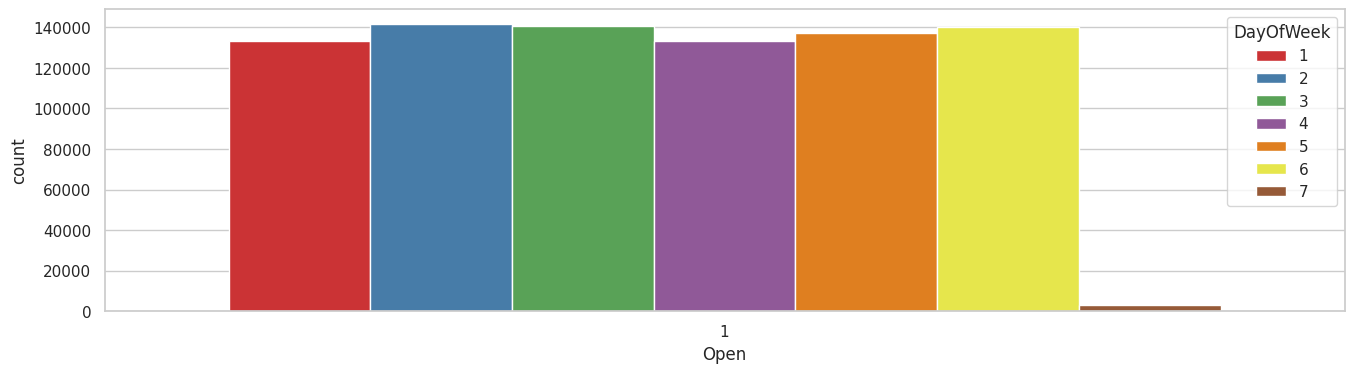

In [75]:
fig, (axis1) = plt.subplots(1,1, figsize = (16,4))
sns.countplot(x = 'Open', hue = 'DayOfWeek', data = df_sales_Rossmann, palette = 'Set1', ax = axis1)

# Observations:

* This above countplot clearly shows that most of the shops are open during weekdays and closed on Sundays.
* Very few stores are closed on weekdays. Public holidays might be the reason for it as stores are usually closed on public holidays and open during school vacations.

# 3.10.1 DayOfWeek vs Sales

Now, let's see how DayOfWeek impacts on Sales and Customers through some beautiful visualizations of bargraphs.

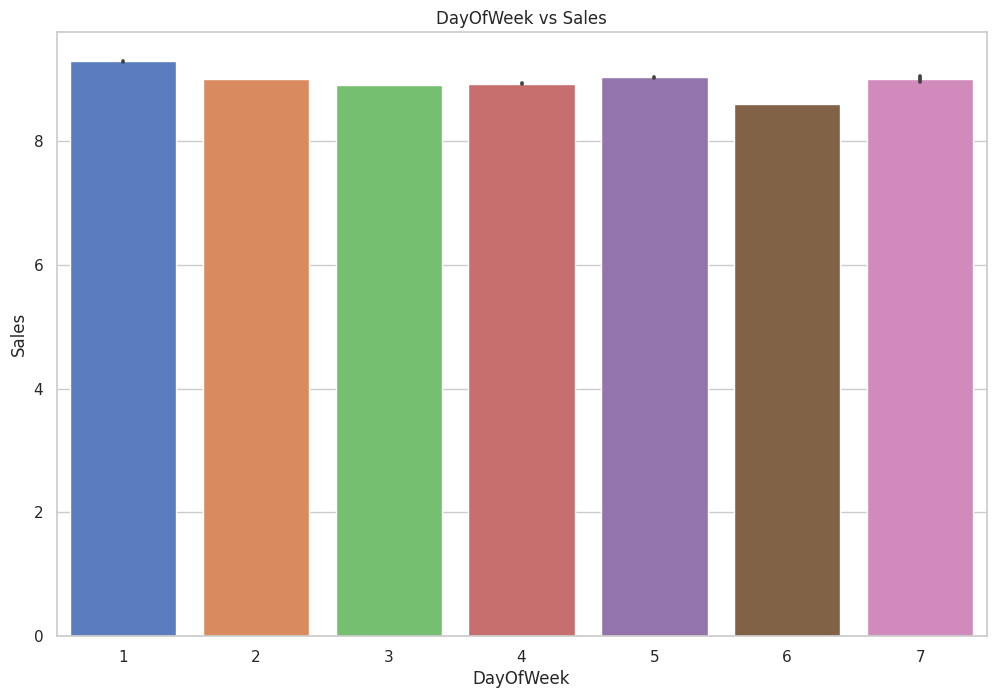

In [76]:

# Bargraph of DayOfWeek vs Sales

sns.barplot(x = df_sales_Rossmann['DayOfWeek'], y = df_sales_Rossmann['Sales'])
plt.title('DayOfWeek vs Sales')
plt.show()

# Observations:

* The above graph tells that most sales are done on weekdays. 
* On the other hand, sales are lagging behind on weekends though stores are closed on weekends ( Specially on Sundays ). Maximum number of sales are done on the very first day of a week.
* So, more or less sales almost stay the same on each and every day of a week.

# 3.10.2 DayOfWeek vs Customers

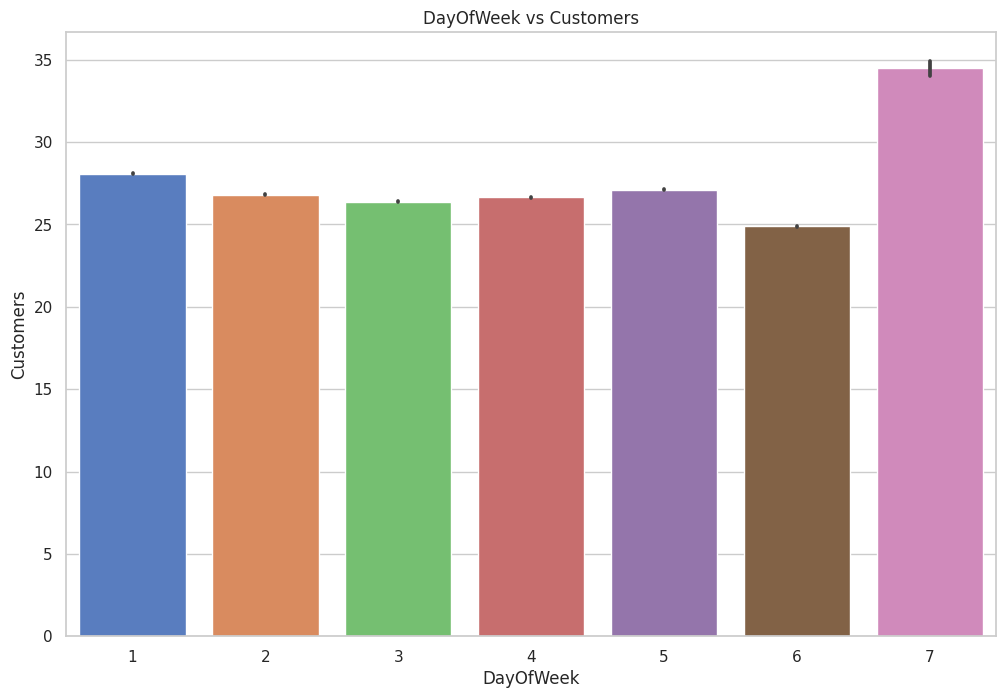

In [77]:
# Bargraph DayOfWeek vs Customers

sns.barplot(x = df_sales_Rossmann['DayOfWeek'], y = df_sales_Rossmann['Customers'])
plt.title("DayOfWeek vs Customers")
plt.show()

# Observations:

* This bargraph shows that most customers love to walk in to stores during weekends.
* Maximum walk-in happen on Sundays.
* Weekdays are not lagging behind rather huge number of customers love to come along on weekdays.

# 3.10.3 Average Sales Per Day Of The Week

Let's get into some more analysis. Let's have a look at average sales per day of the week.

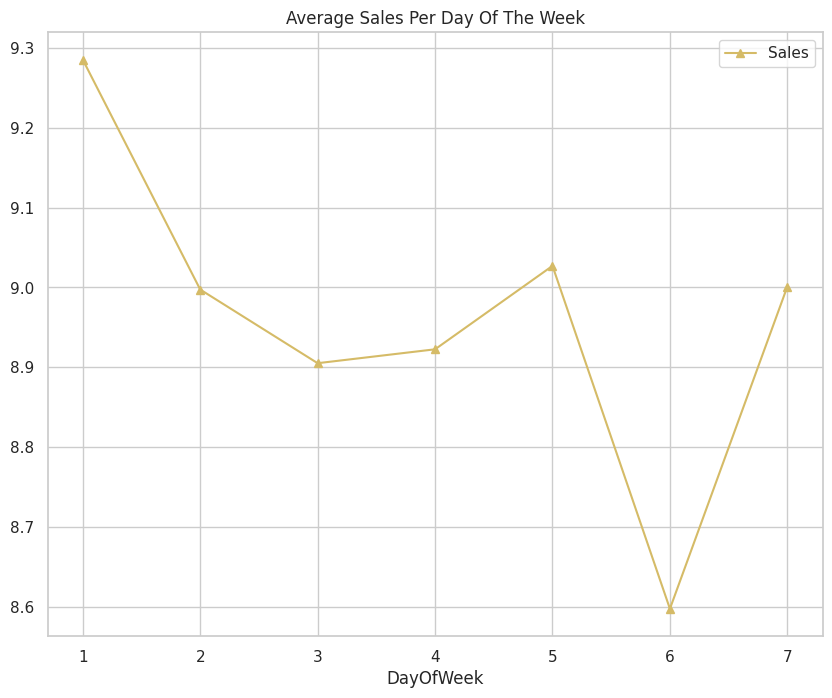

In [78]:

# Average sales per day of the week

axis = df_sales_Rossmann.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'y')
axis.set_title('Average Sales Per Day Of The Week')
plt.show()

# Observations:

* It is evident that average sales is the highest on the very first day of a week.
* The average sales stays almost the same on the rest of the weekdays.
* On Saturdays, it is coming to the lowest point and on Sundays it is getting higher.
* Sundays are far better than Saturdays during weekends but less than other normal weekdays as far as the average sales is concerned.

# 3.10.4 Average Customers Per Day Of The Week

Now, let's have a look how average number of customers reflects in terms of per day of the week.

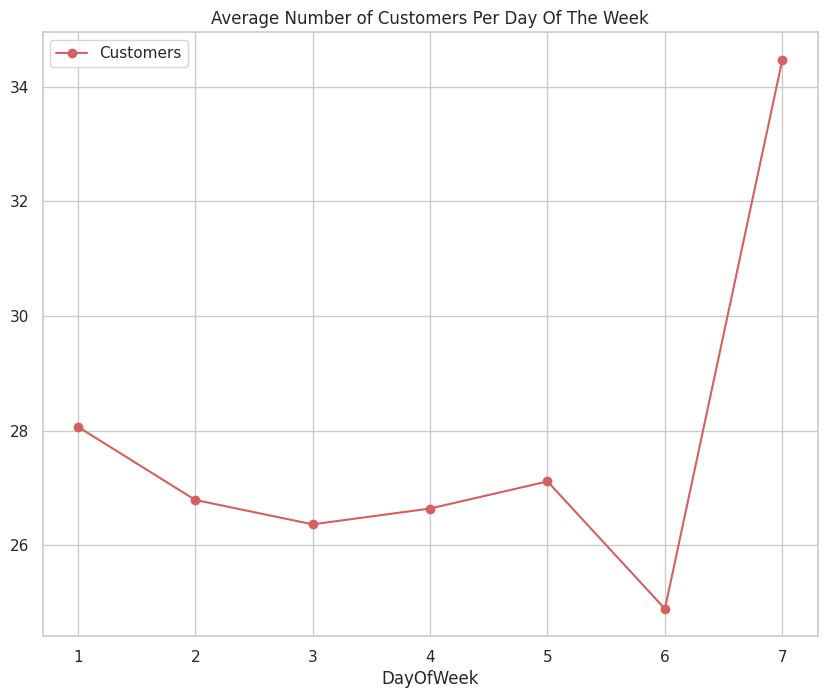

In [79]:
# Average number of customers per day of the week

axis = df_sales_Rossmann.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'r')
axis.set_title('Average Number of Customers Per Day Of The Week')
plt.show()

# Observations:

* This graph shows that most numbers customers walk in on Sundays and the minimum number of customers are on Saturdays.
* So, weekends show the minimum and maximum number of customers on Saturdays and Sundays respectively.
* The walk-ins of customers almost stay the same on weekdays except on Mondays where the walkins stay a bit higher in comparison with other weekdays.

# 3.11 Sales Per Year

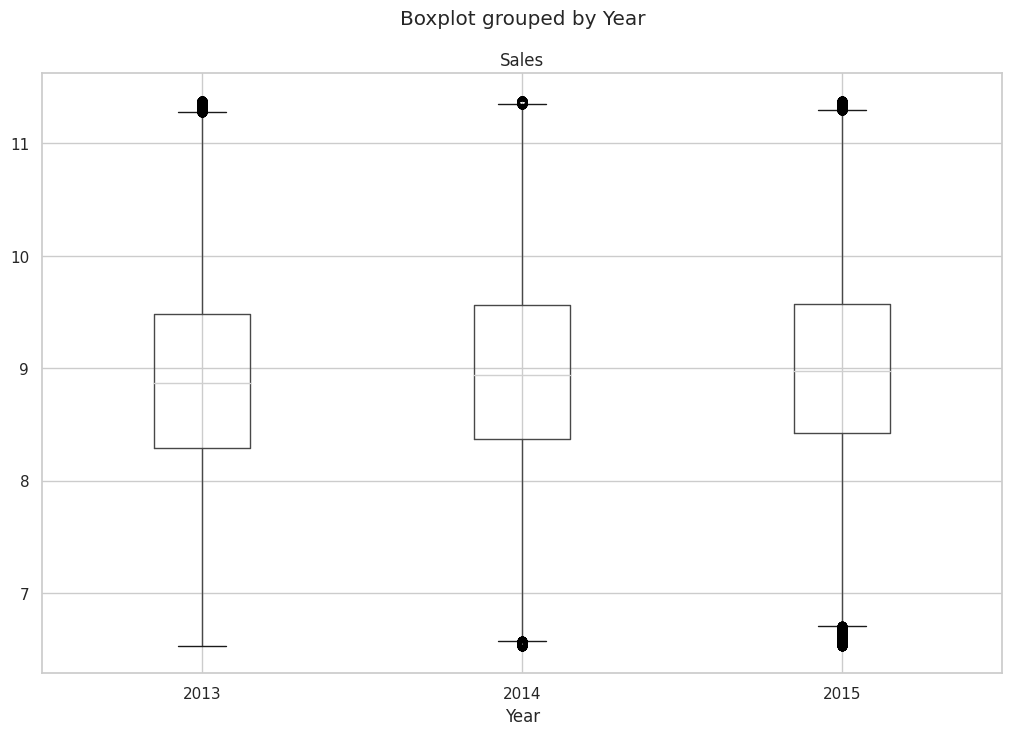

In [80]:
# Plotting boxplot graph to visualize sales per year

df_sales_Rossmann.boxplot(column= 'Sales', by = 'Year')
plt.show()

# 3.12 Sales And Customers Per Month

# 3.12.1 Average Sales Per Month

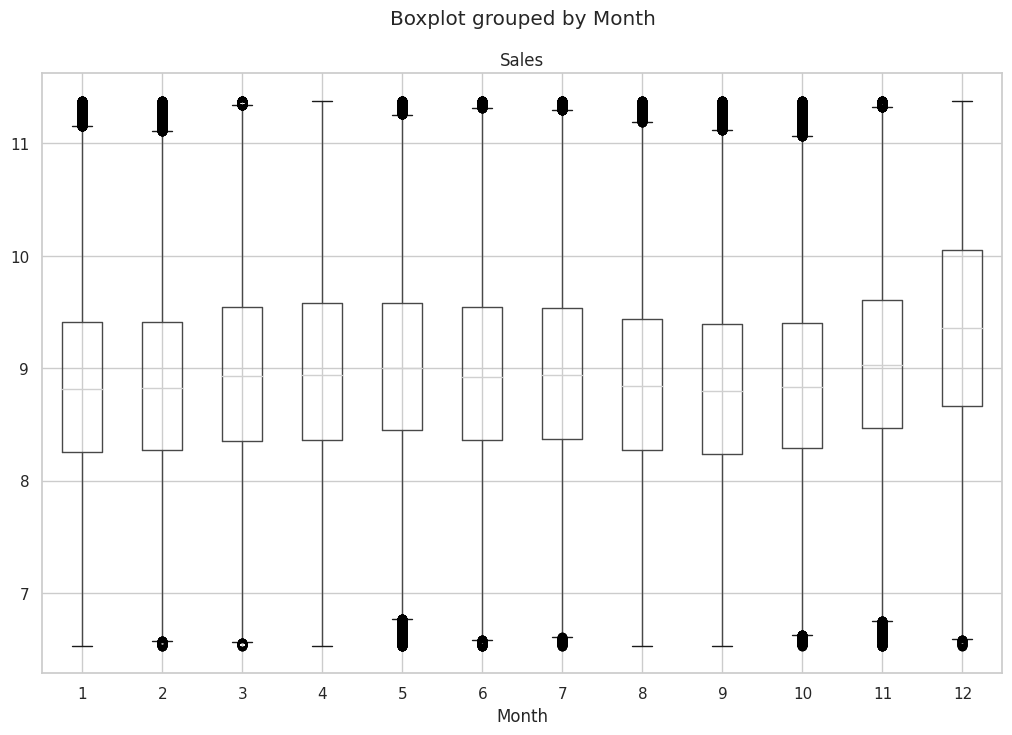

In [81]:
# Plotting of average sales per month through boxplot

df_sales_Rossmann.boxplot(column = 'Sales', by = 'Month')

Here, sales per month means average sales per month. Let's visualize average sales per month.

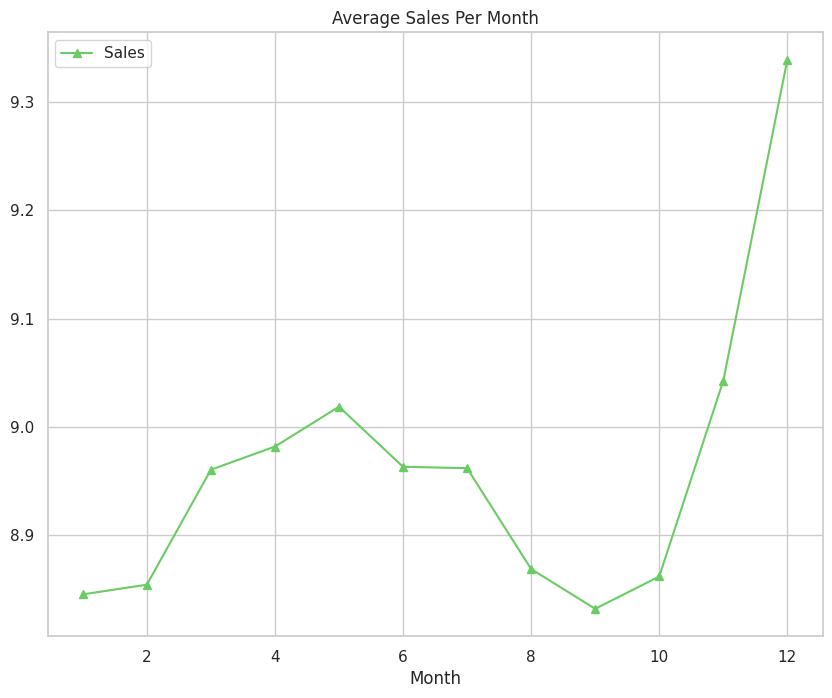

In [82]:
# Plotting average sales per month

axis = df_sales_Rossmann.groupby('Month')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'g')
axis.set_title('Average Sales Per Month')
plt.show()

# 3.12.2 Average Customers Per Month

The average numbers of customers per month has been calculated on the basis of beautiful data visualization boxplot.

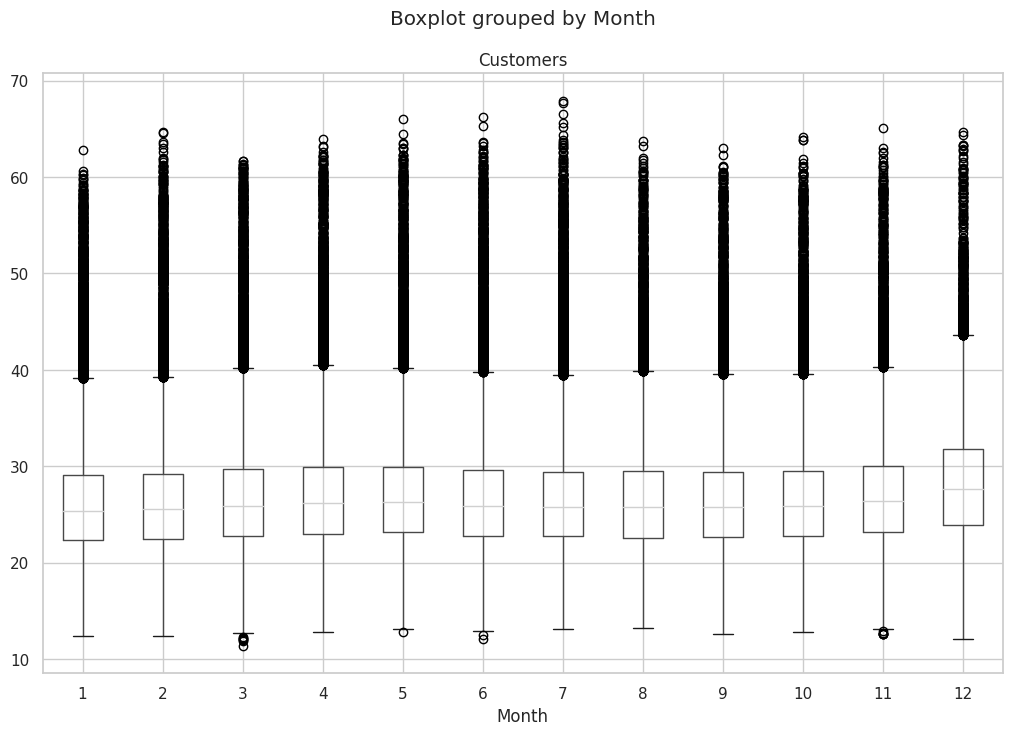

In [83]:
# Plotting of average customers per month through boxplot

df_sales_Rossmann.boxplot( column = 'Customers', by = 'Month')

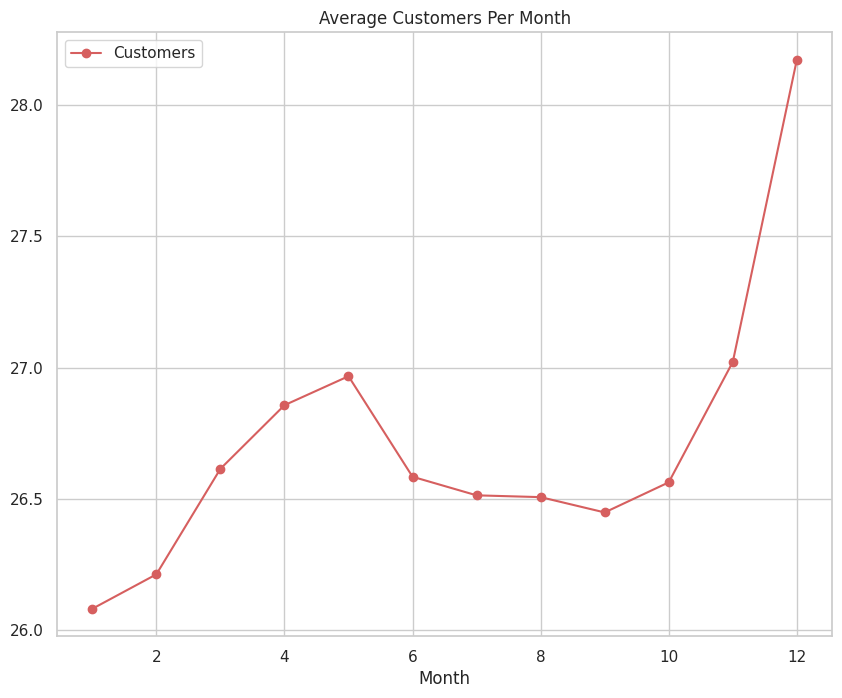

In [84]:

# Plotting average customers per month

axis = df_sales_Rossmann.groupby('Month')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'r')
axis.set_title('Average Customers Per Month')
plt.show()

# 3.13 Sales And Customers Per Day

# 3.13.1 Average Sales Per Day

Average sales per day will be calculated in almost similar way by which average sales per month has been calculated in previous sections.

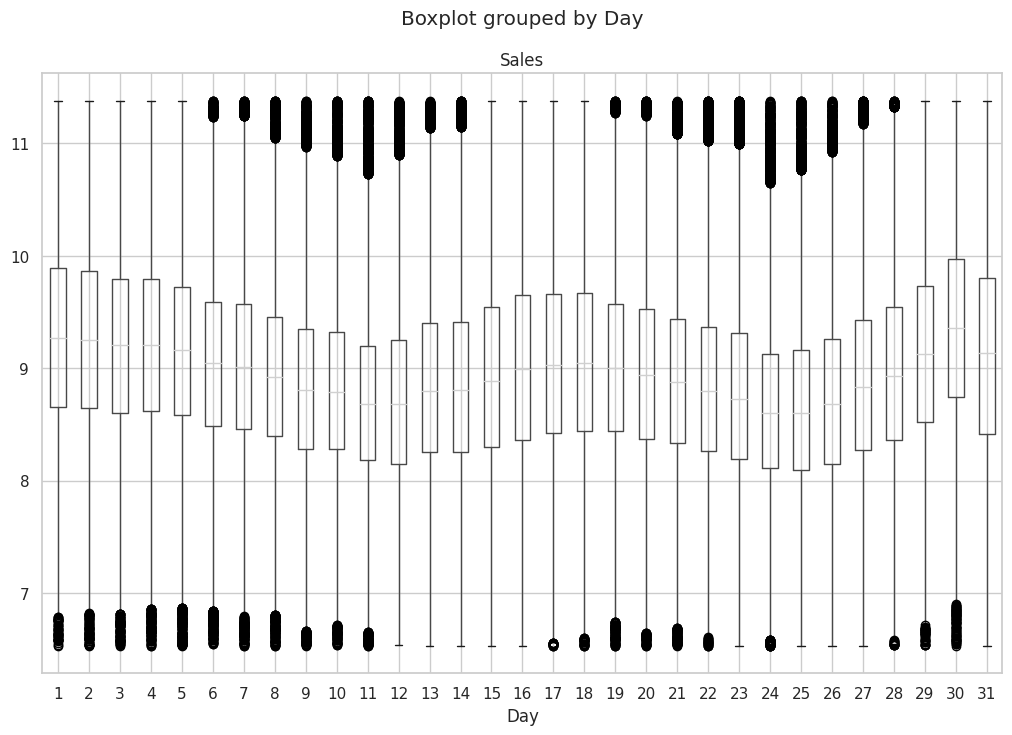

In [85]:
# Average sales per day through boxplot

df_sales_Rossmann.boxplot(column = 'Sales', by = 'Day')

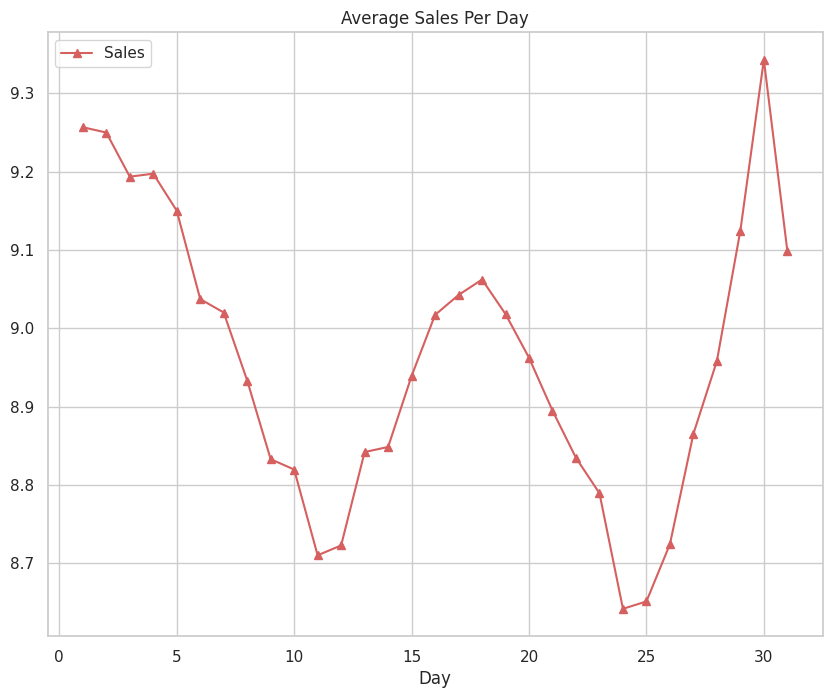

In [86]:
# Data visualization of average sales per day

axis = df_sales_Rossmann.groupby('Day')[['Sales']].mean().plot(figsize = (10,8), marker = '^', color = 'r')
axis.set_title('Average Sales Per Day')
plt.show()

# 3.13.2 Average Customers Per Day

Average customers per day will be calculated in almost similar way by which average customers per month has been calculated in previous sections.

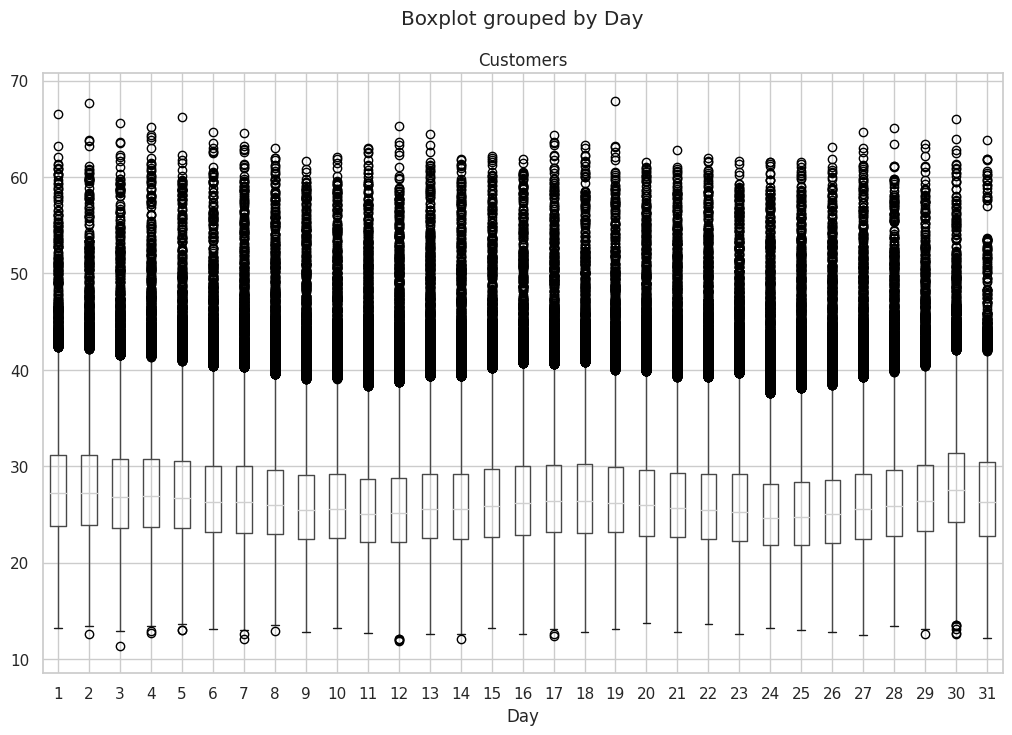

In [87]:
# Average customers per day through the visualization of boxplot

df_sales_Rossmann.boxplot(column = 'Customers', by = 'Day')

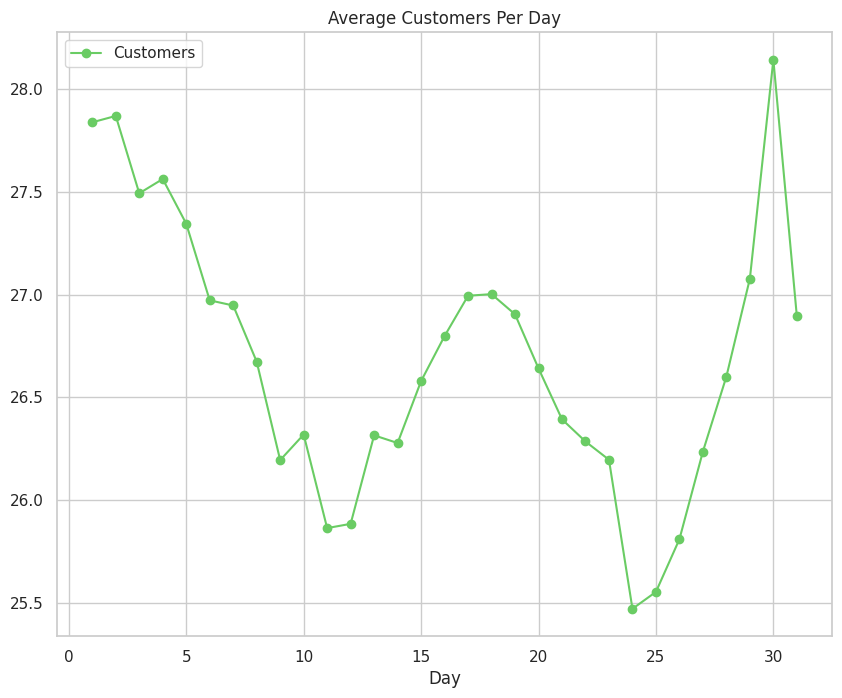

In [88]:
# Data visualization of average customers per day

axis = df_sales_Rossmann.groupby('Day')[['Customers']].mean().plot(figsize = (10,8), marker = 'o', color = 'g')
axis.set_title('Average Customers Per Day')
plt.show()

# Observations:

Some more observations have been summarized over here as some points of observations might be missed out in previous sections.

* Promotional offers play a minor role to the increment of sales, revenue and customers for all stores in general.
* Sales is strongly correlated to the number of customers.
* Stores which are opened during school holidays have more sales than on normal days.
* More stores are opened during school holidays than on public holidays.
* Sales increase during Christmas time i,e,. at the end of a year. This might be because people love to spend on products on the eve of and during the time of Christmas, Boxing Day and New Year.

# 4. Merging Datasets

There are two datasets available in this analysis. One is stores dataset and other is sales dataset of Rossmann. These two datasets will be merged to perform further analysis.

Let's see the details of the columns in both sales and stores dataset of Rossmann.

In [89]:
# Printing the columns of sales dataset of Rossmann

print(df_sales_Rossmann.columns)

print('\n')

# Printing the columns of stores dataset of Rossmann

print(df_stores_Rossmann.columns)

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'Quarter'],
      dtype='object')


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [90]:
# Merging of sales and stores datasets of Rossmann using left join

df_merged_Rossmann = pd.merge(left = df_sales_Rossmann, right = df_stores_Rossmann, how = 'left', on = 'Store')

In [91]:
# Checking number of rows and columns in the merged dataset

df_merged_Rossmann.shape

(829123, 23)

In [92]:
# First five rows of merged dataset of Rossmann

df_merged_Rossmann.head()

Store  DayOfWeek      Sales  Customers  Open  Promo  StateHoliday  \
0      1          5   8.517425  23.558438     1      1             0   
1      2          5   8.824494  25.000000     1      1             0   
2      3          5   9.548882  28.653098     1      1             0   
3      4          5  10.876602  38.704005     1      1             0   
4      5          5   8.333104  23.643181     1      1             0   

   SchoolHoliday  Year  Month  ...  Quarter  StoreType  Assortment  \
0              1  2015      7  ...        3          c           a   
1              1  2015      7  ...        3          a           a   
2              1  2015      7  ...        3          a           a   
3              1  2015      7  ...        3          c           c   
4              1  2015      7  ...        3          a           a   

   CompetitionDistance CompetitionOpenSinceMonth CompetitionOpenSinceYear  \
0               1270.0                       9.0                   2008.0   
1                570.0                      11.0                   2007.0   
2              14130.0                      12.0                   2006.0   
3                620.0                       9.0                   2009.0   
4              29910.0                       4.0                   2015.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0       0              0.0              0.0                0  
1       1             13.0           2010.0  Jan,Apr,Jul,Oct  
2       1             14.0           2011.0  Jan,Apr,Jul,Oct  
3       0              0.0              0.0                0  
4       0              0.0              0.0                0  

[5 rows x 23 columns]

# 4.1 EDA Of Merged Dataset

Let's do the EDA again of the merged dataset to have a better satisfaction and visualization of both datasets in terms of the merged dataset.

# 4.1.1 The Effect of StateHoliday and SchoolHoliday on Sales

The effect of StateHoliday and SchoolHoliday on Sales will be analyzed by some beautiful data visualization graphs. Some specific categorical variables will be analyzed with the target variable 'Sales'.

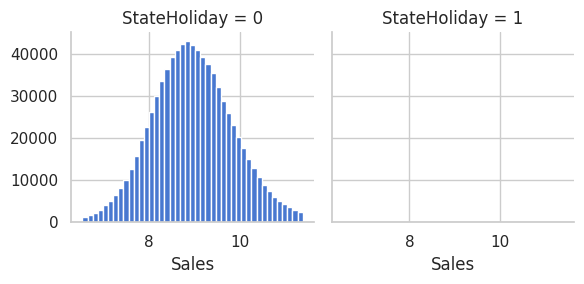

In [93]:
# The effect of StateHoliday on Sales

grid1 = sns.FacetGrid(df_merged_Rossmann, col= 'StateHoliday')
grid1.map(plt.hist, 'Sales', bins = 43)
plt.show()

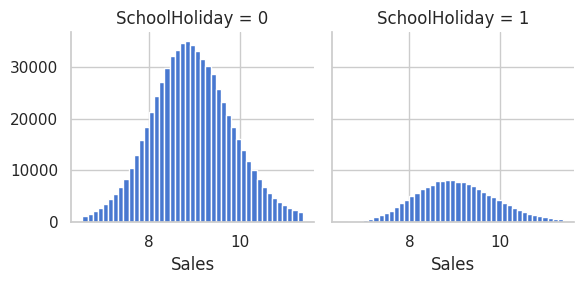

In [94]:
# The effect of SchoolHoliday on Sales

grid2 = sns.FacetGrid(df_merged_Rossmann, col= 'SchoolHoliday')
grid2.map(plt.hist, 'Sales', bins = 43)
plt.show()

# Observations:

* It can be observed from the graphs that there is negligible sales during state holidays and the amount of sale is very less during school holidays.
* So, it is better to eliminate 'StateHoliday' column from our training model.

# 4.1.2 The Effect of CompetitionOpenSinceMonth on Sales

The effect of CompetitionOpenSinceMonth on Sales will be analyzed by some beautiful data visualization graphs.

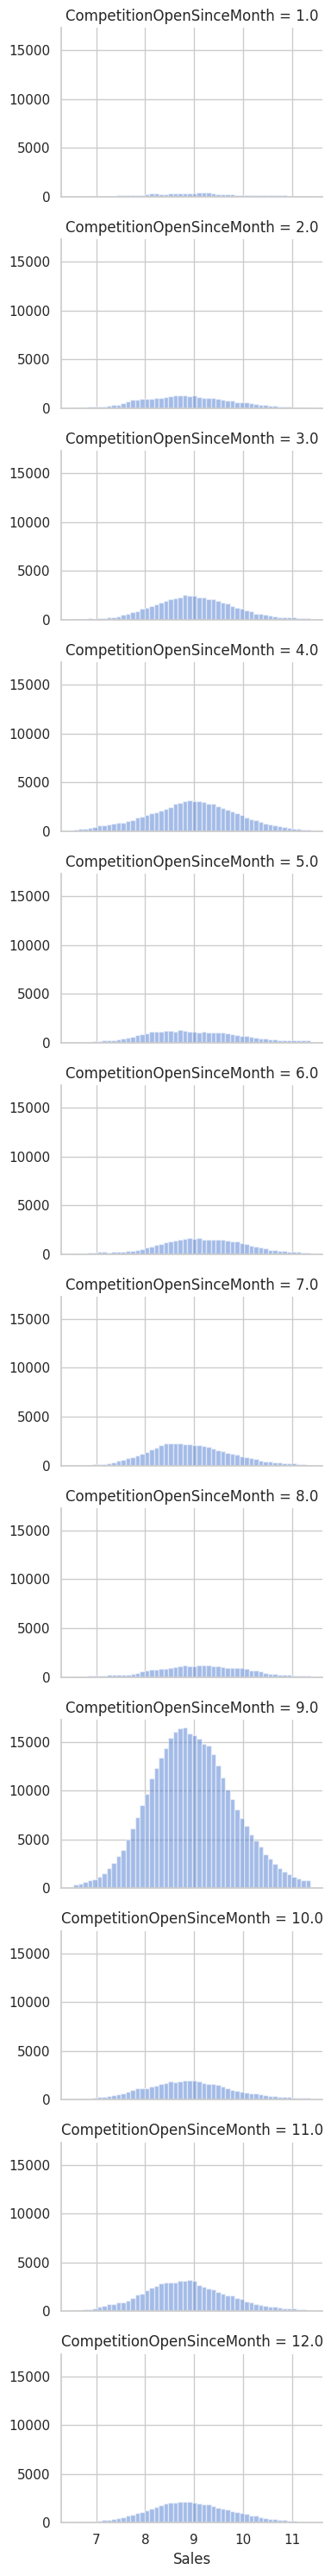

In [95]:
# the effect of CompetitionOpenSinceMonth on Sales

grid3 = sns.FacetGrid(df_merged_Rossmann, row='CompetitionOpenSinceMonth',palette='Set1',size=2.5, aspect=1.6)
grid3.map(plt.hist, 'Sales', alpha=.5, bins=50)
plt.show()

# 4.1.3 The Effect of Promo2 on Sales and Customers

The effect of Promo2 on Sales and Customers will be analyzed by some beautiful data visualization graphs.

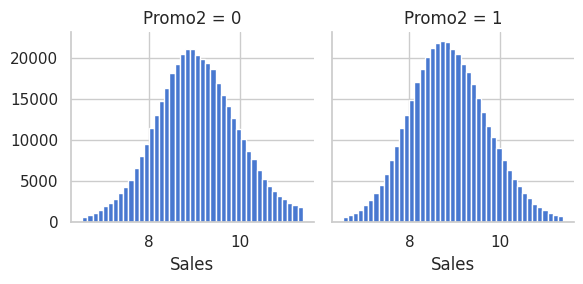

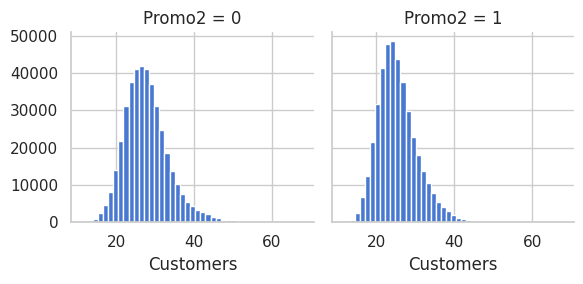

In [96]:
# The effect of promo on sales

grid4 = sns.FacetGrid(df_merged_Rossmann, col = 'Promo2',palette='Set1')
grid4.map(plt.hist, 'Sales', bins=43)
plt.show()

# The effect of promo on customers

grid5 = sns.FacetGrid(df_merged_Rossmann, col = 'Promo2',palette='Set1')
grid5.map(plt.hist, 'Customers', bins=43)
plt.show()

# Observations:
* Promo2 feature has not been able to impact that much on Sales and Customers as much as it should be.
* Sales and Customers have been the same in both scenarios ( With promo2 (1) and without promo2 (0)).

# 4.1.4 Sales Per Year


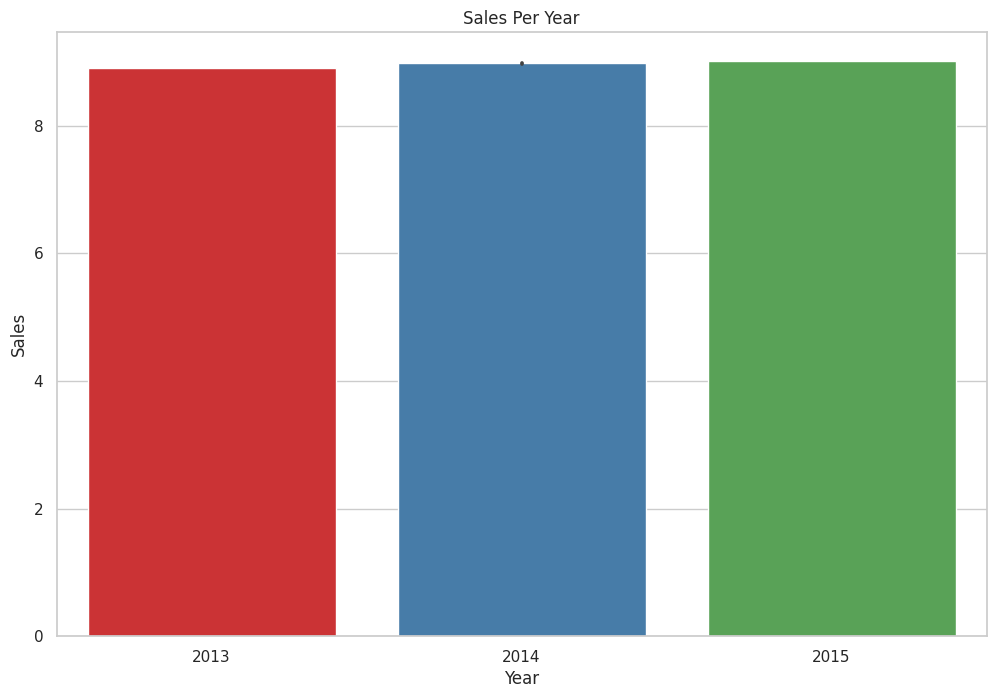

In [97]:
# Let's view sales per year through bargraph.

sns.set_theme( style = 'whitegrid')
axe = sns.barplot(x = 'Year', y = 'Sales', data = df_merged_Rossmann, palette = 'Set1')
plt.title('Sales Per Year')
plt.show()


# 4.1.5 Sales Per Month

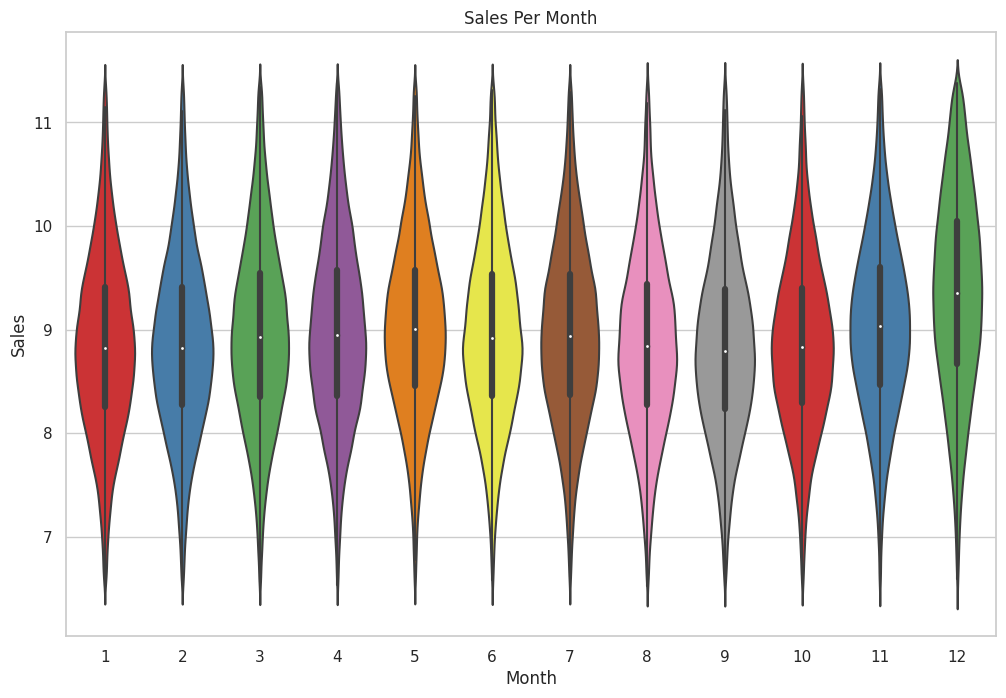

In [98]:
# Viloinplot will help visualize the sales per month.

sns.set_theme(style = 'whitegrid')
sns.violinplot(x = 'Month', y = 'Sales', data = df_merged_Rossmann, palette = 'Set1')
plt.title("Sales Per Month")
plt.show()

# 4.1.6 Sales Per Week Of Year

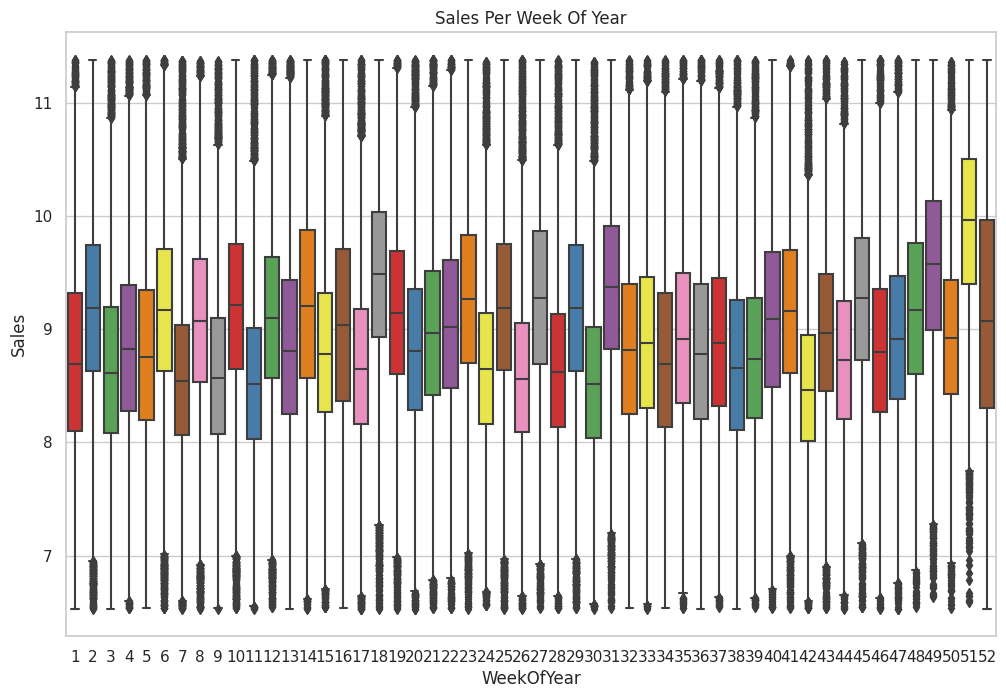

In [99]:
# Sales per week of year through boxplot

sns.set_theme(style = 'whitegrid')
sns.boxplot(x = 'WeekOfYear', y = 'Sales', data = df_merged_Rossmann, palette = 'Set1')
plt.title("Sales Per Week Of Year")
plt.show()

# 4.1.7 Sales Per Day

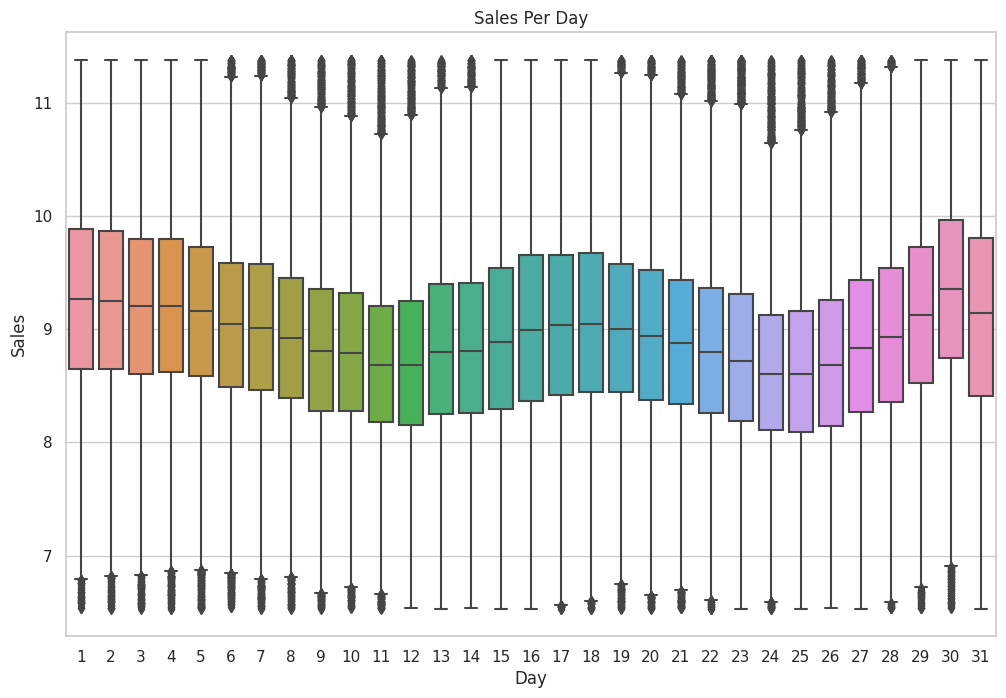

In [100]:
# Boxplot of Sales per day

sns.set_theme(style = 'whitegrid')
sns.boxplot(x = 'Day', y = 'Sales', data = df_merged_Rossmann)
plt.title('Sales Per Day')
plt.show()

# Observations:

* 2015 has the maximum sale followed by 2014 and 2013.
* The difference in sales amongst these three years is very less.
* Mondays have the highest sales and Sundays have the lowest sales.
* Sales per month has been almost the same except the fag end of the year where sales increases by leaps and bounds due to festive occasions ( Such as : Christmas, New Year's celebration, Boxing Day).

# 4.1.8 Sales vs Promo

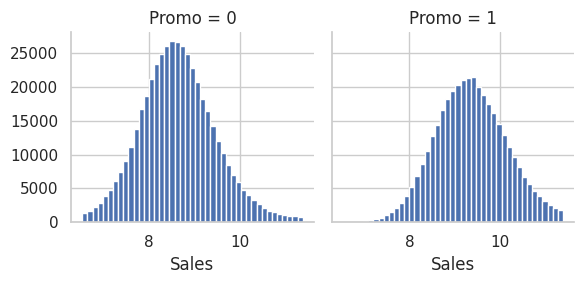

In [101]:
# Sales vs Promo

g1 = sns.FacetGrid(df_merged_Rossmann, col='Promo',palette='Set1')
g1.map(plt.hist, 'Sales',bins=43)
plt.show()

# 4.1.9 Customers vs Promo

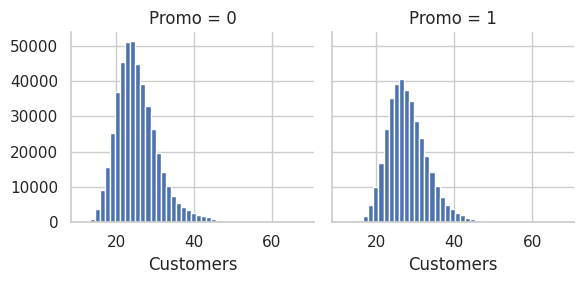

In [102]:
# Customers vs Promo

g2 = sns.FacetGrid(df_merged_Rossmann, col='Promo',palette='Set2')
g2.map(plt.hist, 'Customers',bins=43)
plt.show()

# Observations:

* Promo feature has not been able to impact that much on Sales and Customers as much as it should be.
* Sales and Customers have been more rather without promo.

# 4.1.10 Sales vs StoreType

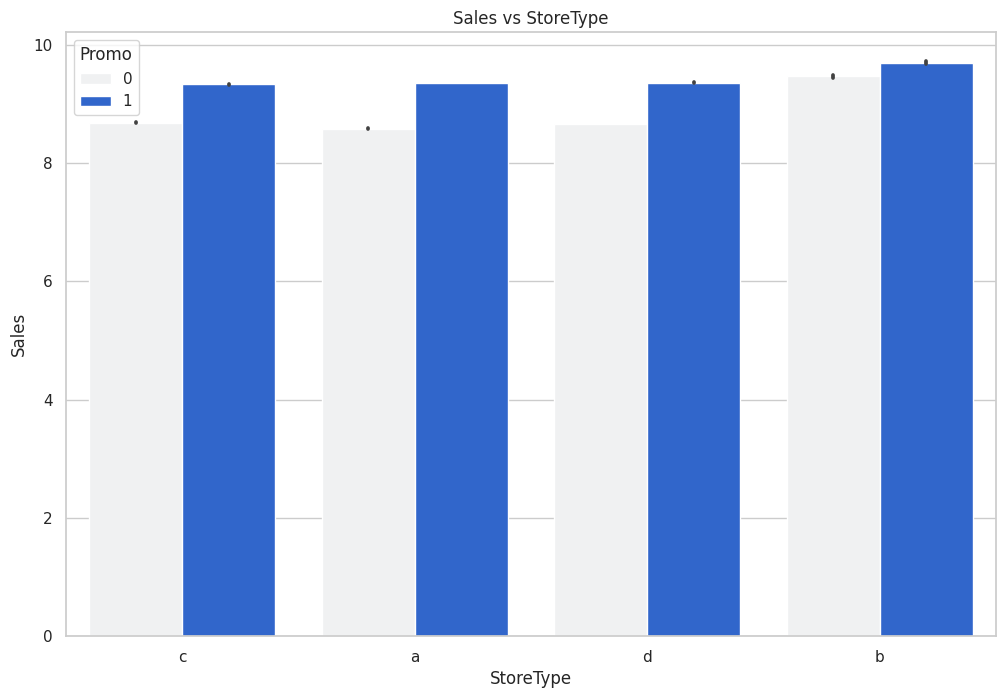

In [103]:
# Bargraph of Sales vs StoreType

sns.set_theme(style = 'whitegrid', palette = 'Set1')
sns.barplot(x = 'StoreType', y = 'Sales', hue = 'Promo', data = df_merged_Rossmann, color = '#175ee5')
plt.title('Sales vs StoreType')
plt.show()


# 4.1.11 Sales vs Assortment

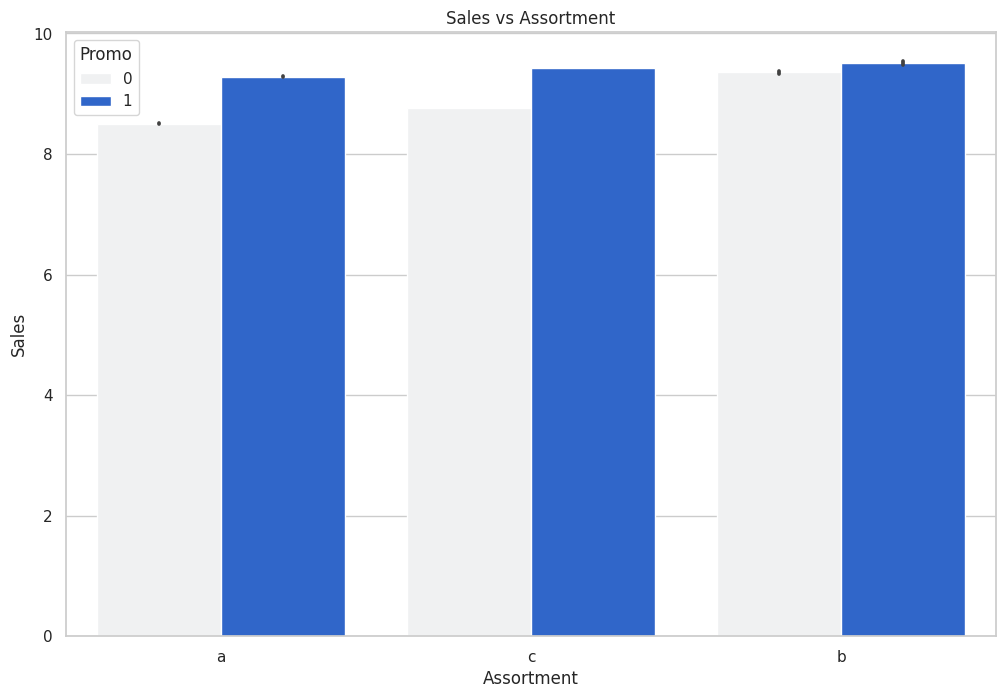

In [104]:
# Barplot of Sales vs Assortment

sns.set_theme( style = 'whitegrid', palette = 'winter')
sns.barplot(x = 'Assortment', y = 'Sales', hue = 'Promo', data = df_merged_Rossmann, color = '#165ee3')
plt.title('Sales vs Assortment')
plt.show()

# Observations:

* There is a sharp increment in sales for type a,c,d stores with promo.
* There is a slight increment in sales for type b store with promo.
* So, there is a direct positive impact on sales through promotional offers in stores in general.
* There is a sharp increment in sales for type a and c assortment with promo.
* But, it's been almost the same in case of type b assortment even with promo.


In [105]:
# Printing last five rows of the merged dataset of Rossmann

df_merged_Rossmann.tail()

Store  DayOfWeek      Sales  Customers  Open  Promo  StateHoliday  \
829118    682          2   7.621991  23.790755     1      0             1   
829119    733          2  10.185996  48.754487     1      0             1   
829120    769          2   8.423641  35.327043     1      0             1   
829121    948          2   8.186264  32.233523     1      0             1   
829122   1097          2   8.786781  37.483330     1      0             1   

        SchoolHoliday  Year  Month  ...  Quarter  StoreType  Assortment  \
829118              1  2013      1  ...        1          b           a   
829119              1  2013      1  ...        1          b           b   
829120              1  2013      1  ...        1          b           b   
829121              1  2013      1  ...        1          b           b   
829122              1  2013      1  ...        1          b           b   

        CompetitionDistance CompetitionOpenSinceMonth  \
829118                150.0                       9.0   
829119                860.0                      10.0   
829120                840.0                       9.0   
829121               1430.0                       9.0   
829122                720.0                       3.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
829118                   2006.0       0              0.0              0.0   
829119                   1999.0       0              0.0              0.0   
829120                   2013.0       1             48.0           2012.0   
829121                   2013.0       0              0.0              0.0   
829122                   2002.0       0              0.0              0.0   

          PromoInterval  
829118                0  
829119                0  
829120  Jan,Apr,Jul,Oct  
829121                0  
829122                0  

[5 rows x 23 columns]

In [106]:
# Checking datatypes of merged dataset

df_merged_Rossmann.dtypes

Store                          int64
DayOfWeek                      int64
Sales                        float64
Customers                    float64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Year                           int64
Month                          int64
Day                            int64
Week                           int64
WeekOfYear                     int64
Quarter                        int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [107]:

# Checking null values of merged dataset

df_merged_Rossmann.isna().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
Week                         0
WeekOfYear                   0
Quarter                      0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [108]:
# Information of the merged dataset in details

df_merged_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829123 entries, 0 to 829122
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      829123 non-null  int64  
 1   DayOfWeek                  829123 non-null  int64  
 2   Sales                      829123 non-null  float64
 3   Customers                  829123 non-null  float64
 4   Open                       829123 non-null  int64  
 5   Promo                      829123 non-null  int64  
 6   StateHoliday               829123 non-null  int64  
 7   SchoolHoliday              829123 non-null  int64  
 8   Year                       829123 non-null  int64  
 9   Month                      829123 non-null  int64  
 10  Day                        829123 non-null  int64  
 11  Week                       829123 non-null  int64  
 12  WeekOfYear                 829123 non-null  int64  
 13  Quarter                    82

There are still three object datatype in merged dataset. These are 'StoreType', 'Assortment', 'PromoInterval'. Let's do the necessary steps to convert these datatypes. Also, One Hot Encoding will be implemented for further analysis.

In [109]:
# Counting values of column 'PromoInterval'

df_merged_Rossmann['PromoInterval'].value_counts()

0                   412338
Jan,Apr,Jul,Oct     239506
Feb,May,Aug,Nov      97283
Mar,Jun,Sept,Dec     79996
Name: PromoInterval, dtype: int64

In [110]:
# Replacing 0 with 'No Promo'

df_merged_Rossmann.loc[df_merged_Rossmann['PromoInterval'] == 0, 'PromoInterval'] = 'No Promo'

In [111]:
# Now counting values of 'PromoInterval'

df_merged_Rossmann['PromoInterval'].value_counts()

No Promo            412338
Jan,Apr,Jul,Oct     239506
Feb,May,Aug,Nov      97283
Mar,Jun,Sept,Dec     79996
Name: PromoInterval, dtype: int64

# 5. Feature Selection of Regression Model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1b5c9bf40>,
      dtype=object)

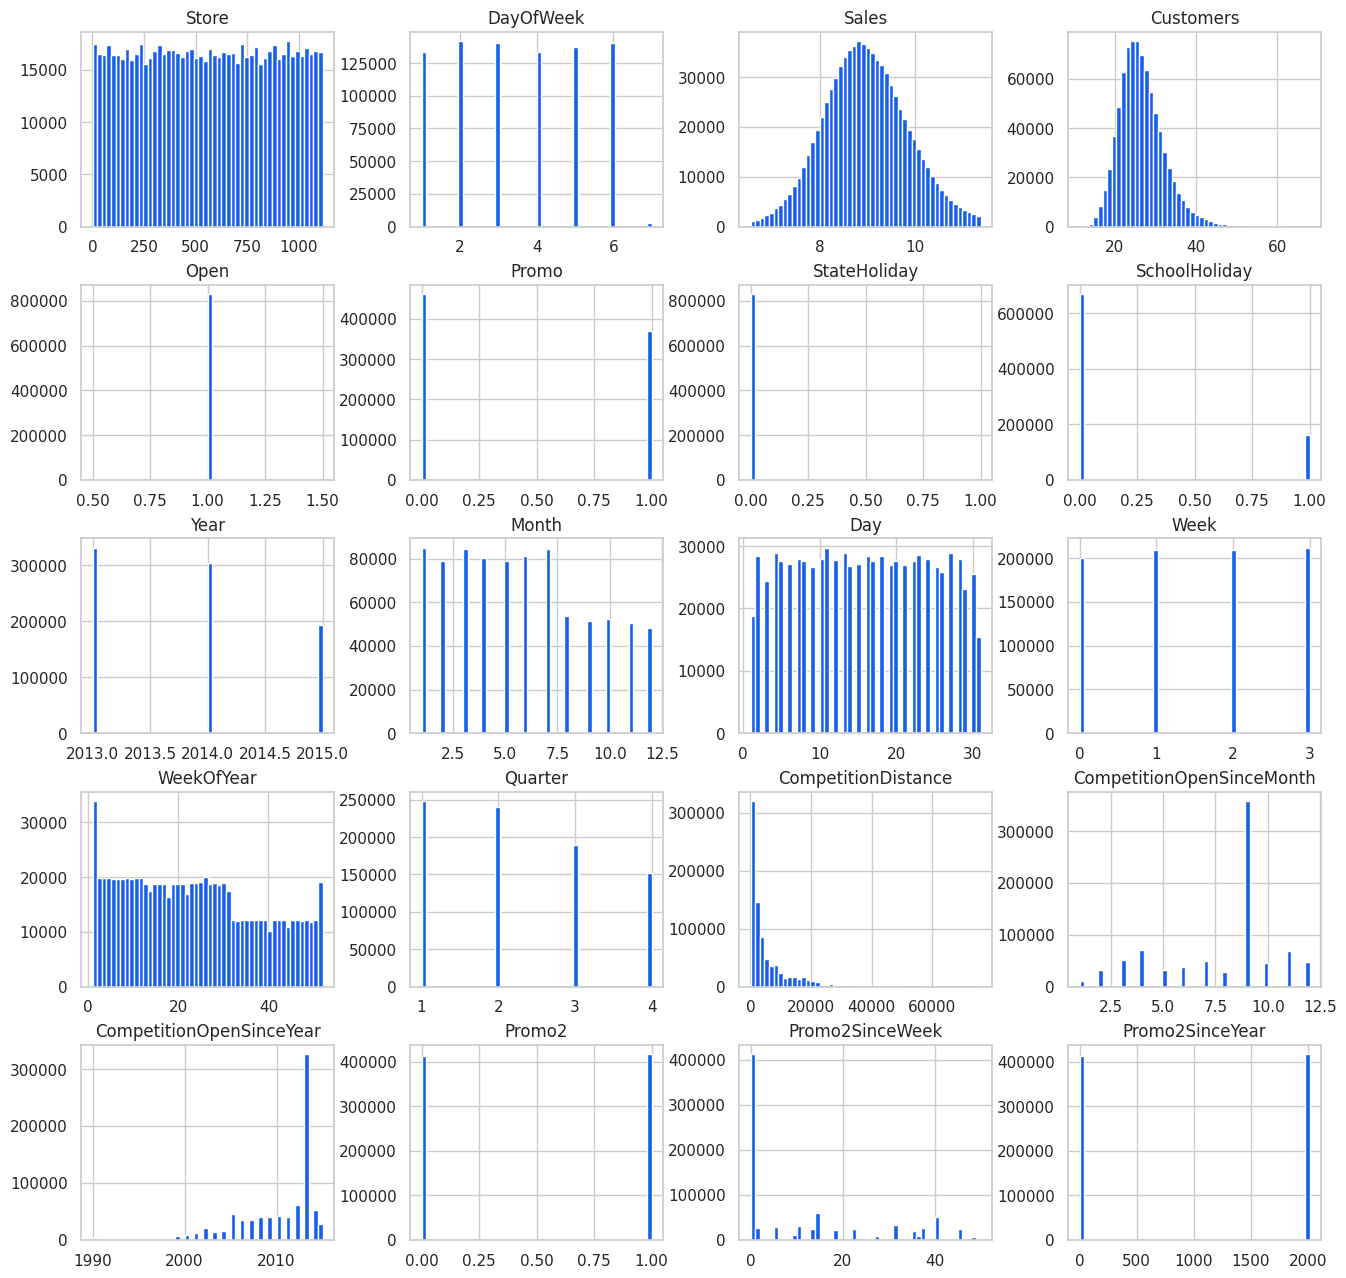

In [112]:
# Feature selection in case of regression

import warnings
warnings.filterwarnings('ignore')
df_merged_Rossmann.hist(figsize = (16,16), bins = 50, color = '#175ee9')


# 5.1 Assumptions in Regression

Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which does not fulfill its assumptions. So for a successful regression analysis, it is very much essential to validate these assumptions.

* There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). 
* There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation. 
* The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity. 
* The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
* The error terms must be normally distributed.

# 5.1.1 Linearity

Linearity is the property of a mathematical relationship that can be graphically represented as a straight line. Linearity is closely related to proportionality.Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relationship of independent variables with the Sales variable.

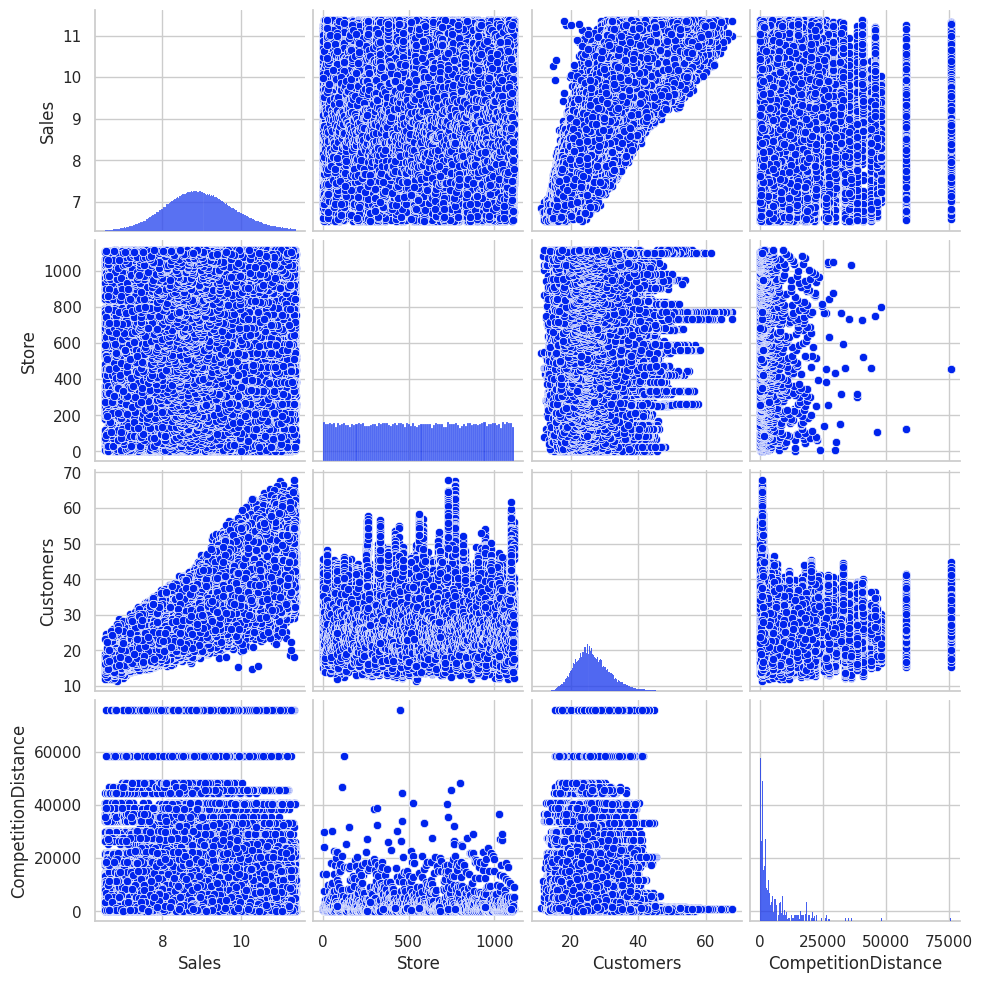

In [113]:
# Checking the relationship of independent variables with target variable (Sales)

plot = df_merged_Rossmann[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(plot)
plt.show()

Let's check the relationship between some independent variables with the target variable 'Sales' through some beautiful visualizations of joint plot.

# 5.1.2 Sales vs Store

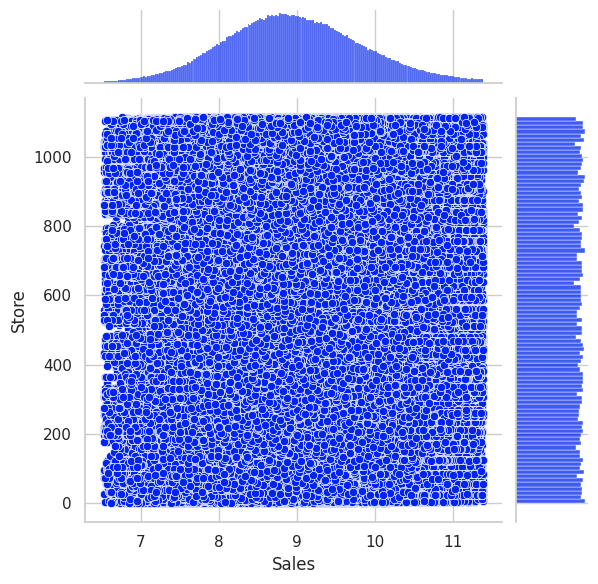

In [114]:
# Joint plot of Sales vs Stores

sns.jointplot(x = 'Sales', y = 'Store', data = df_merged_Rossmann)
plt.show()

# 5.1.3 Sales vs Customers

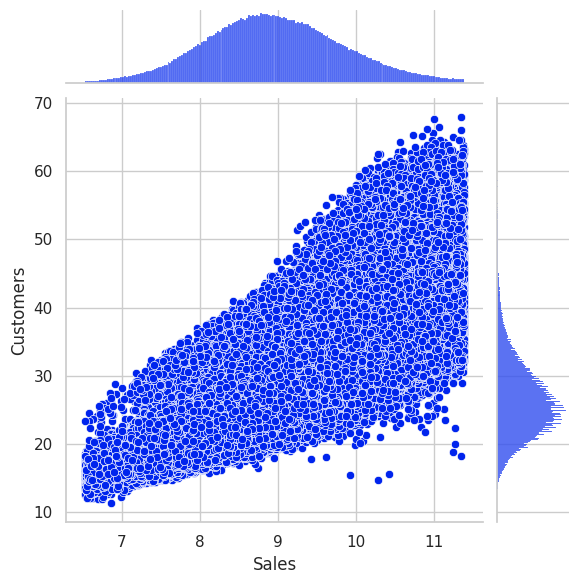

In [115]:
# Joint plot of Sales vs Customers

sns.jointplot(x = 'Sales', y = 'Customers', data = df_merged_Rossmann)
plt.show()

# 5.1.4 Sales vs CompetitionDistance

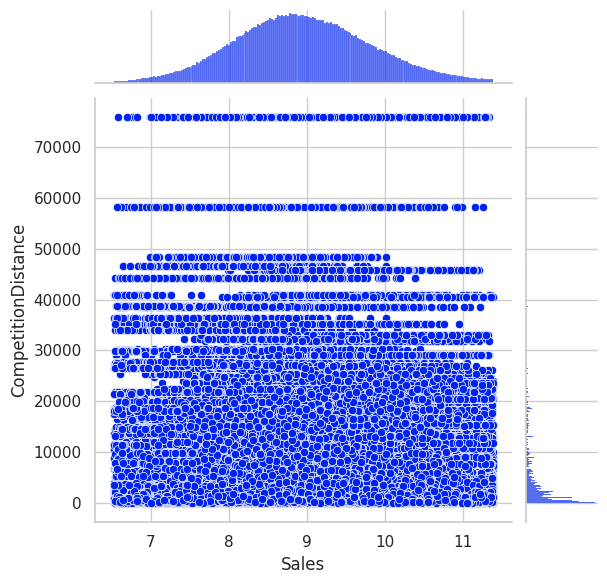

In [116]:
# Jointplot of Sales vs CompetitionDistance

sns.jointplot(x = 'Sales', y = 'CompetitionDistance', data = df_merged_Rossmann)
plt.show()

# Observations: 

* From those above joint plots, it can be observed that none of these independent variables ('Store', 'Customers', 'CompetitionDistance) construct an accurate linear shape with the target variable 'Sales'.
* Therefore , it can be said that a linear regression model might not be the best model for it.
* A Linear model might not be able to explain that data with respect to prediction accuracy, variability.

# 5.2 Correlation and Multicollinearity

* Correlation is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation while a zero correlation implies no linear relationship at all. Correlation shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. The correlation coefficient's values range between -1.0 and 1.0.

* Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard to interpret of model and also creates an overfitting problem. It is a common assumption that people test before selecting the variables into the regression model.

# 5.3 One Hot Encoding

One Hot Encoding algorithm is an encoding system of Sci-kit learn library. It is used to convert numerical categorical variables into binary vectors. Before applying this algorithm we need to be sure that the categorical values must be label encoded as one hot encoding takes only numerical categorical values. One Hot Encoding has been applied in the merged dataset here by get_dummies method. Let's see how it is done.

In [117]:
# One Hot Encoding by get_dummies method

df_merged_Rossmann = pd.get_dummies(df_merged_Rossmann, columns = ['StoreType', 'Assortment', 'PromoInterval'])

In [118]:
# The new merged dataset after One Hot Encoding

df_merged_Rossmann

Store  DayOfWeek      Sales  Customers  Open  Promo  StateHoliday  \
0           1          5   8.517425  23.558438     1      1             0   
1           2          5   8.824494  25.000000     1      1             0   
2           3          5   9.548882  28.653098     1      1             0   
3           4          5  10.876602  38.704005     1      1             0   
4           5          5   8.333104  23.643181     1      1             0   
...       ...        ...        ...        ...   ...    ...           ...   
829118    682          2   7.621991  23.790755     1      0             1   
829119    733          2  10.185996  48.754487     1      0             1   
829120    769          2   8.423641  35.327043     1      0             1   
829121    948          2   8.186264  32.233523     1      0             1   
829122   1097          2   8.786781  37.483330     1      0             1   

        SchoolHoliday  Year  Month  ...  StoreType_b  StoreType_c  \
0                   1  2015      7  ...            0            1   
1                   1  2015      7  ...            0            0   
2                   1  2015      7  ...            0            0   
3                   1  2015      7  ...            0            1   
4                   1  2015      7  ...            0            0   
...               ...   ...    ...  ...          ...          ...   
829118              1  2013      1  ...            1            0   
829119              1  2013      1  ...            1            0   
829120              1  2013      1  ...            1            0   
829121              1  2013      1  ...            1            0   
829122              1  2013      1  ...            1            0   

        StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0                 0             1             0             0   
1                 0             1             0             0   
2                 0             1             0             0   
3                 0             0             0             1   
4                 0             1             0             0   
...             ...           ...           ...           ...   
829118            0             1             0             0   
829119            0             0             1             0   
829120            0             0             1             0   
829121            0             0             1             0   
829122            0             0             1             0   

        PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                                   0                              0   
1                                   0                              1   
2                                   0                              1   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
829118                              0                              0   
829119                              0                              0   
829120                              0                              1   
829121                              0                              0   
829122                              0                              0   

        PromoInterval_Mar,Jun,Sept,Dec  PromoInterval_No Promo  
0                                    0                       1  
1                                    0                       0  
2                                    0                       0  
3                                    0                       1  
4                                    0                       1  
...                                ...                     ...  
829118                               0                       1  
829119                               0                       1  
829120                 

In [119]:
# Number of columns of the new merged dataset of Rossmann

df_merged_Rossmann.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'Quarter', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'PromoInterval_No Promo'],
      dtype='object')

In [120]:
# The general in detal information of all the columns of the merged dataset

df_merged_Rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829123 entries, 0 to 829122
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           829123 non-null  int64  
 1   DayOfWeek                       829123 non-null  int64  
 2   Sales                           829123 non-null  float64
 3   Customers                       829123 non-null  float64
 4   Open                            829123 non-null  int64  
 5   Promo                           829123 non-null  int64  
 6   StateHoliday                    829123 non-null  int64  
 7   SchoolHoliday                   829123 non-null  int64  
 8   Year                            829123 non-null  int64  
 9   Month                           829123 non-null  int64  
 10  Day                             829123 non-null  int64  
 11  Week                            829123 non-null  int64  
 12  WeekOfYear      

# 5.4 Correlation Heatmap

Correlation Matrix : A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.



Let's create a correlation heatmap to visualize correlation amongst variables.

# 5.4.1 Selection Of Independent Variables

In [121]:
# Independent variables selection

df_selected = df_merged_Rossmann[['DayOfWeek', 'Sales', 'Customers', 'Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear', 'Promo2',  'Year', 'Month','Week',
                     'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']]

In [122]:
# Correlation process

Correlation = df_selected.corr()
Correlation

DayOfWeek     Sales  Customers     Promo  \
DayOfWeek                  1.000000 -0.181927  -0.113918 -0.282545   
Sales                     -0.181927  1.000000   0.811354  0.406960   
Customers                 -0.113918  0.811354   1.000000  0.214834   
Promo                     -0.282545  0.406960   0.214834  1.000000   
SchoolHoliday             -0.137425  0.038878   0.027311  0.028396   
CompetitionDistance        0.001176 -0.008248  -0.137082  0.001903   
CompetitionOpenSinceYear   0.003099  0.026383   0.006649 -0.003016   
Promo2                    -0.003738 -0.106414  -0.210094  0.002316   
Year                       0.001826  0.048243   0.003114  0.023677   
Month                     -0.017679  0.063368   0.050429 -0.008176   
Week                       0.002841  0.025843   0.012673  0.064207   
StoreType_a               -0.005765 -0.037536   0.114634  0.002092   
StoreType_b                0.038705  0.086921   0.346297 -0.023466   
StoreType_c               -0.002352  0.007714   0.086160  0.002908   
StoreType_d               -0.002703  0.010839  -0.282347  0.002058   
Assortment_a              -0.006869 -0.118662  -0.026019  0.005274   
Assortment_b               0.027201  0.051816   0.304204 -0.013307   
Assortment_c               0.001537  0.108638  -0.033687 -0.002667   

                          SchoolHoliday  CompetitionDistance  \
DayOfWeek                     -0.137425             0.001176   
Sales                          0.038878            -0.008248   
Customers                      0.027311            -0.137082   
Promo                          0.028396             0.001903   
SchoolHoliday                  1.000000            -0.002813   
CompetitionDistance           -0.002813             1.000000   
CompetitionOpenSinceYear      -0.001182             0.021957   
Promo2                        -0.008006            -0.144445   
Year                          -0.039444             0.000952   
Month                          0.119776             0.004358   
Week                          -0.020885             0.000145   
StoreType_a                    0.002943            -0.034243   
StoreType_b                   -0.003354            -0.072854   
StoreType_c                    0.002185            -0.097839   
StoreType_d                   -0.003859             0.129104   
Assortment_a                   0.004178            -0.147636   
Assortment_b                  -0.002745            -0.054203   
Assortment_c                  -0.003644             0.158469   

                          CompetitionOpenSinceYear    Promo2      Year  \
DayOfWeek                                 0.003099 -0.003738  0.001826   
Sales                                     0.026383 -0.106414  0.048243   
Customers                                 0.006649 -0.210094  0.003114   
Promo                                    -0.003016  0.002316  0.023677   
SchoolHoliday                            -0.001182 -0.008006 -0.039444   
CompetitionDistance                       0.021957 -0.144445  0.000952   
CompetitionOpenSinceYear                  1.000000  0.005275  0.000474   
Promo2                                    0.005275  1.000000 -0.005540   
Year                                      0.000474 -0.005540  1.000000   
Month                                     0.000404 -0.024559 -0.268925   
Week                                      0.000044  0.000432  0.010354   
StoreType_a                              -0.037278 -0.071315  0.000462   
StoreType_b                              -0.005139 -0.049669  0.002063   
StoreType_c                              -0.043622 -0.000581  0.002212   
StoreType_d                               0.073755  0.090936 -0.002697   
Assortment_a                             -0.107552 -0.009651 -0.002323   
Assortment_b                             -0.011002 -0.012134  0.000447   
Assortment_c                              0.109849  0.012047  0.002239   

                             Month      Week  StoreType_a  StoreType_b 

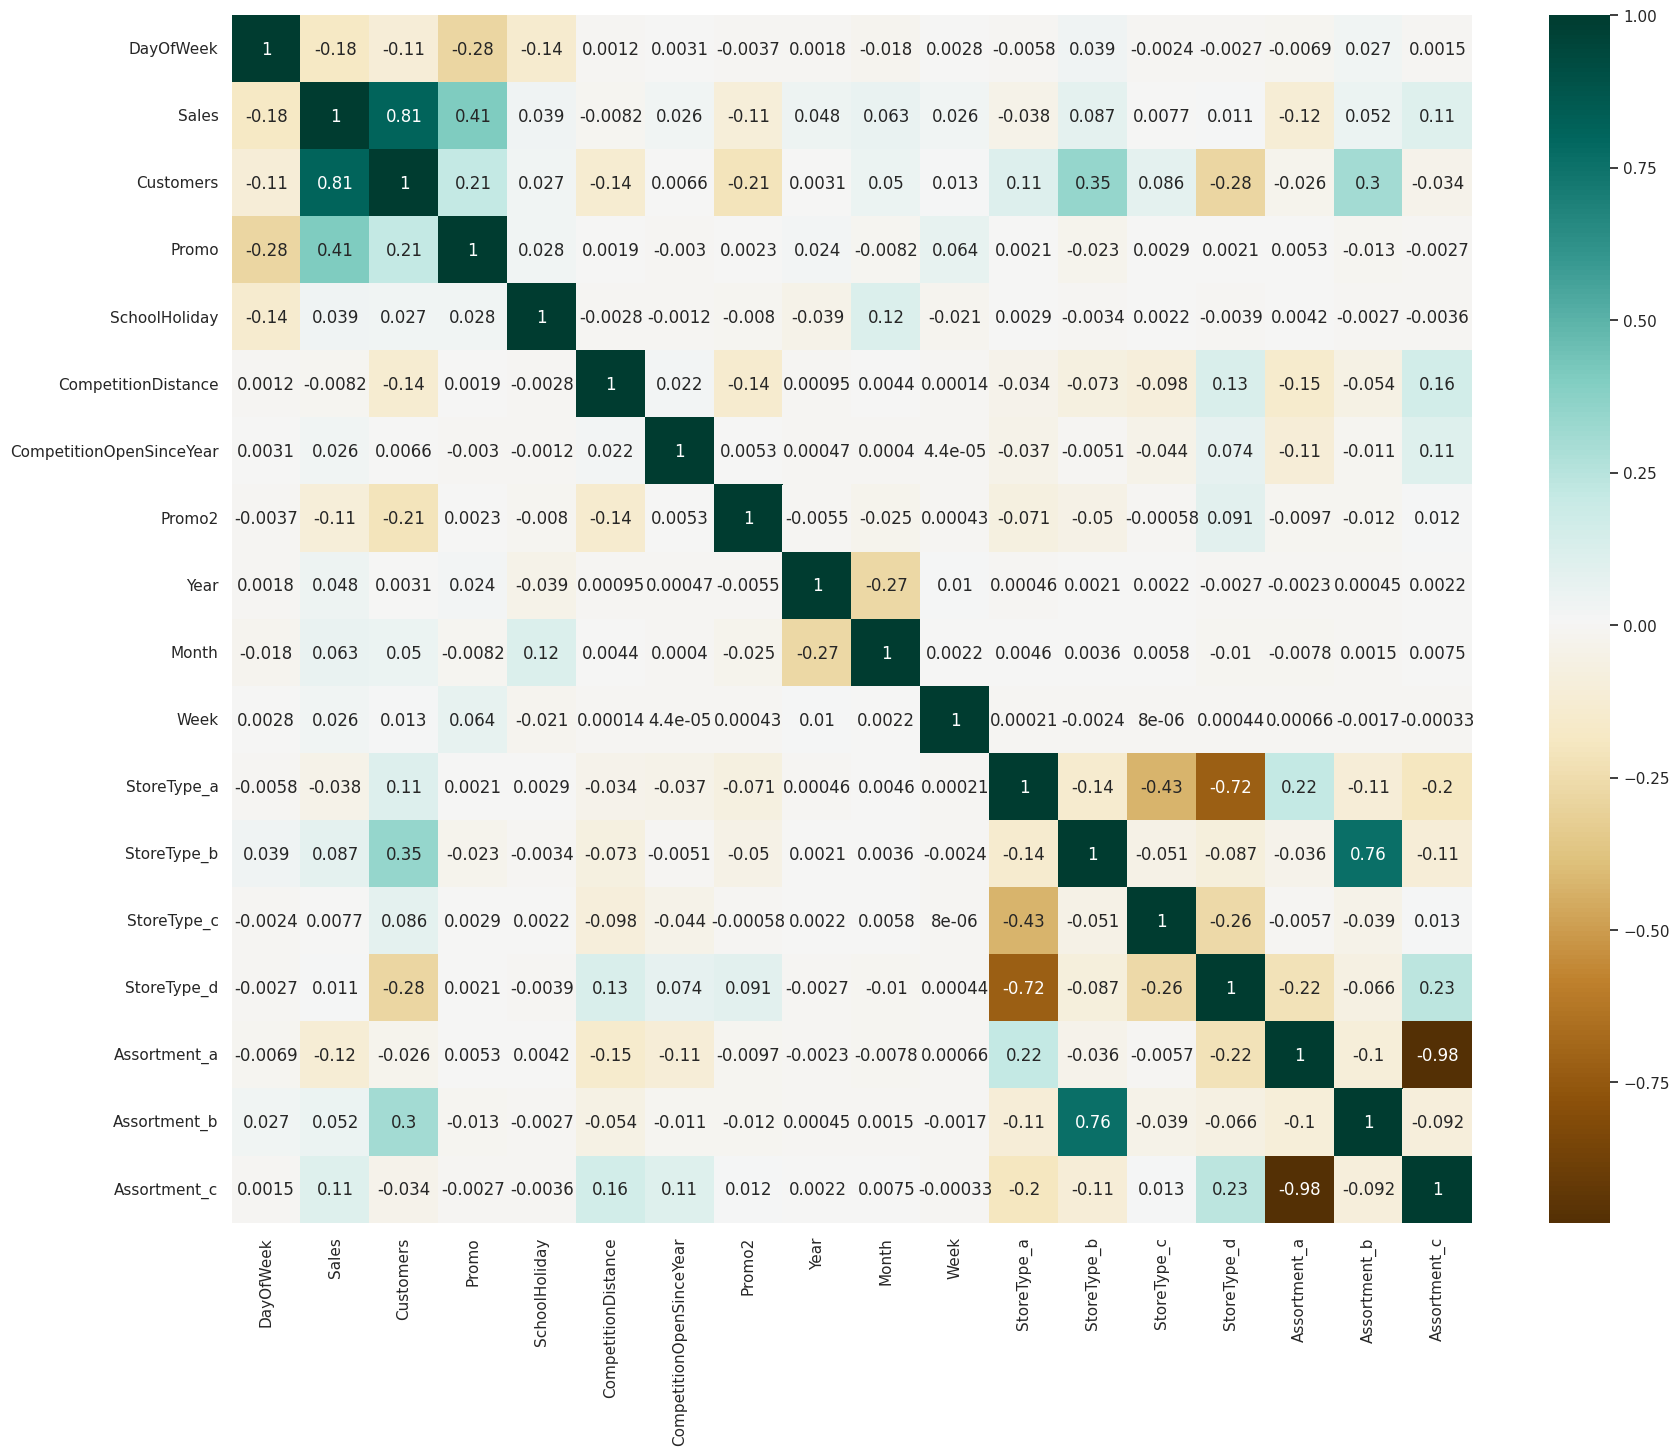

In [123]:
# Plotting correlation heatmap

plt.figure(figsize=(20,16))
sns.heatmap(Correlation, cmap="BrBG", annot=True)
plt.show()
     

# Observations:

* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.

* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.

* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce.

* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.

* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

# 5.4.2 Final Selection Of Independent Variables

In [124]:
# Selecting independent variables finally from previous selected dataset

df_final = df_selected[['DayOfWeek', 'Sales', 'Customers','SchoolHoliday', 'CompetitionDistance',
                     'CompetitionOpenSinceYear', 'Promo2', 'Year', 'Month', 'Week']]

# 6. Model Building

Now our models will be built based on the following algorithms.

* Linear Regression
* LASSO Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest
* XG Boost
* Ada Boost
* Gradient Boost


# 6.1 Train Test Split

Now, let's split up the data into training and testing set. The model will be trained with the help of training set and then testing set will be used to test or evaluate the model. Let's do it then.

In [125]:
# Creating independent and dependent or target variable

x= df_selected.drop(['Sales'],axis=1)
y= df_merged_Rossmann['Sales']

In [126]:
# Splitting up train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

# 6.2 Linear Regression

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used. There are many names for a regression’s dependent variable.  It may be called an outcome variable, criterion variable, endogenous variable, or regressand.  The independent variables can be called exogenous variables, predictor variables, or regressors. Linear Regression is the simplest among all the algorithms in machine learning. It can be trained in several ways. Let's train and test the Linear Regression mdoel first. Before going further, let's create a function which will evaluate metrics.

In [127]:
# Importing metrics from scikit learn

from sklearn import metrics

# Creating a function to evaluate matrics

try:
  def evaluate_metrics(true, predicted):
    ''' This function evalutes metrics. '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('The value of MAE is : ', mae)
    print('The value of MSE is : ', mse)
    print('The value RMSE is : ', rmse)
    print('The value of R2 Square is : ', r2_square)
except:
  print('The creation of evaluation metrics')

In [128]:
# For Linear Regression importing linaer regression from sklearn

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [129]:
# Calculation of Coefficients

df_coeff = pd.DataFrame(lin_reg.coef_, x.columns, columns = ['Coefficient'])
df_coeff



Coefficient
DayOfWeek                   -0.005245
Customers                    0.143924
Promo                        0.351008
SchoolHoliday                0.012822
CompetitionDistance          0.000009
CompetitionOpenSinceYear    -0.001316
Promo2                       0.129135
Year                         0.058084
Month                        0.009242
Week                         0.000506
StoreType_a                  0.073515
StoreType_b                 -0.599571
StoreType_c                  0.027072
StoreType_d                  0.498984
Assortment_a                 0.360662
Assortment_b                -0.814895
Assortment_c                 0.454233

In [130]:
# calculation of prediction

pred = lin_reg.predict(X_test)

In [131]:
# Evaluation Metrics

train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

# Printing train set and test set evaluation of linear regression model

print('Train Set Evaluation: \n_________________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n ________________________')
evaluate_metrics(y_test, test_pred)


Train Set Evaluation: 
_________________________
The value of MAE is :  0.29086635600183924
The value of MSE is :  0.13339945358932714
The value RMSE is :  0.36523889933758036
The value of R2 Square is :  0.8274014621028712



Test Set Evaluation : 
 ________________________
The value of MAE is :  0.2911002196094185
The value of MSE is :  0.1338136600181971
The value RMSE is :  0.36580549478950847
The value of R2 Square is :  0.8269990891766772


# 6.2.1 Mean of Residuals

A residual or mean of residual is defined as the difference between the observed value and the mean value that the model predicts for that observation. Residual values are especially useful in regression and ANOVA procedures because they indicate the extent to which a model accounts for the variation in the observed data.One of the assumptions is that the mean of residuals should be equal to zero in case of Linear Regression. Let's find out how far this assumption is true.

In [132]:
# Calculation of Mean of Residuals

residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print('Mean of Residuals is : ', mean_residuals)

Mean of Residuals is :  7.814297755680579e-15


The mean of residuals is very close to zero and that is not bad as far as the assumption of Linear Regression is concerned.

# 6.2.2 Checking of Normality of Error Terms or Residuals

Let's find it out through distribution plot.

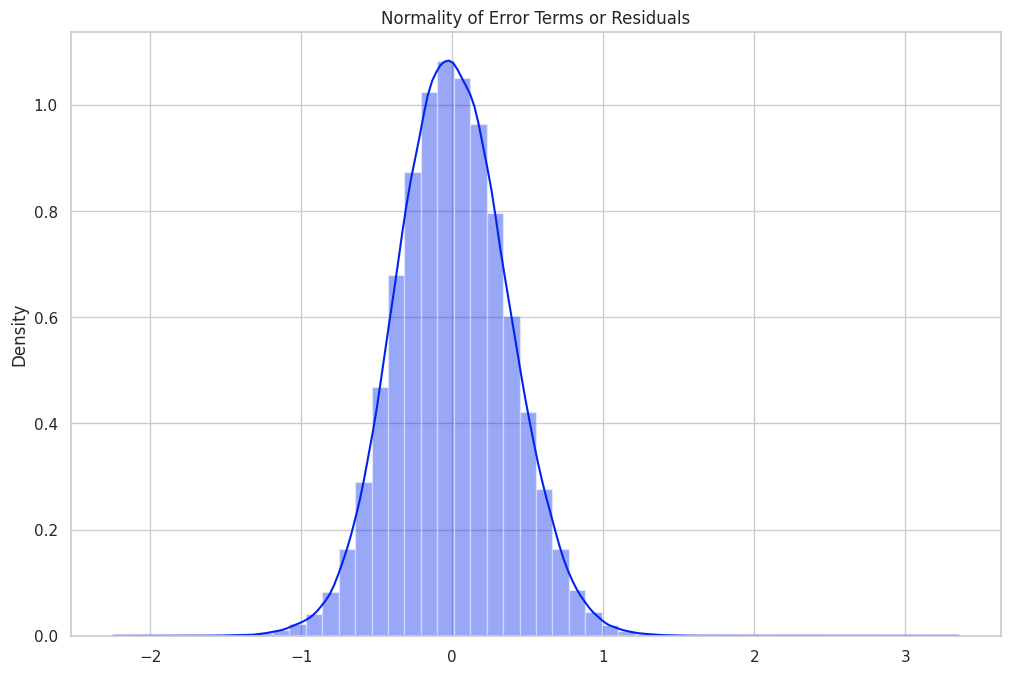

In [133]:
# Distribution plot of Normality of Error Terms or Residuals

norm_error_terms = sns.distplot(residuals, kde = True)
norm_error_terms = plt.title('Normality of Error Terms or Residuals')
plt.show()

# Observation:

The above plot of residual terms is pretty much normally distributed for the number of test points taken. The central theorem says that the increment in sample size tends to mae the distribution normal. It is almost out of the question to have a perfect curve or perfect nornal distribution in real life organization.

# 6.2.3 Cross Validation

Let's implement cross validation to check different accuracy.

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.
Three steps are involved in Cross validation and these are :

* Reserving some portion of sample dataset.
* Using the rest dataset to train the model.
* Testing the model using the reserve portion of the dataset.

In KNN method we use train test split with random state that split exactly same at each time. However, if we do not use random state, data is split differently at each time and in accordance with split accuracy will be different. Hence, we can conclude that model performance is dependent on train_test_split. For example if we split, fit and predict data 5 times and accuracies are 0.87, 0.9, 0.88, 0.92 and 0.96, respectively. Which accuracy can be used ? Do we have any idea what accuracy will be at 6th times split, train and predict. The answer is 'No'. But, if Cross Validation is used, acceptable accuracy can be found out.

Let's check what Cross Validation talks about in terms of K-Fold Cross Validation. In this method,  The dataset is split into k number of subsets which are known as folds. Then training is performed on all the subsets leaving one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.
Here,
Cross Validation  = CV
K folds = K fold CV
When K is increasing, computationally cost is increasing

cross_val_score(LR_model, x, y, cv=5): use reg(linear regression) with x and y and K is 5. It means 5 times(split, train,predict)

In [134]:
# Calculation of Cross Validation
# Importing cross val score from skalearn model selection

from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5

cv_score = cross_val_score(lin_reg, x, y, cv = k) # using R^2 as score
print('CV Score is : ', cv_score)
print('Average CV Score is : ', np.sum(cv_score) / k)

CV Score is :  [0.81559892 0.82897043 0.82901466 0.82616845 0.82487596]
Average CV Score is :  0.8249256852527003


# 6.3 Regularized Regression With HyperParameter Tunning

Linear regression chooses parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the features is important, then it provides high coefficient to that feature. However, this can cause overfitting that is same as memorizing in KNN. In order to avoid overfitting, we use regularization that penalizes large coefficients.

Regularization is a technique which is used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 
The commonly used regularization techniques are : 
 

* L1 regularization
* L2 regularization
* Dropout regularization

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression. 
There can be three scenarios in case of a model. Those are:
* under-fitting: High Bias and Low / High Variance
* balanced model: Low Bias and Low Variance
* over-fitting: Low Bias and High Variance

L1 regularization or LASSO and L2 regularization or Ridge regression will be discussed in next sections.




# 6.4 LASSO Regression

A regression model which uses L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression.Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. It shrinks the regression coefficients towards zero by penalizing the regression model with a penalty term called L1-norm, which is the sum of the absolute coefficients. Lasso Regression adds 'absolute value of magnitude' of coefficient as penalty term to the cost function(J). 

The equation of cost function of LASSO Regression is:

J(theta0, theta1) = OLS + Lambda * absolute value(slope)

where,

lambda = hyperparameter, OLS = Ordinary Least Squares regression, slope = penalty




In [135]:
# Importing lasso from sklearn linear model
from sklearn.linear_model import Lasso
# Importing cross val score from sklearn model selection
from sklearn.model_selection import cross_val_score

lasso = Lasso(selection = 'random', random_state = 0)
parameters = {'alpha' : [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, y_train) # Fitting the object into train dataset

train_pred = lasso_regressor.predict(X_train)
test_pred = lasso_regressor.predict(X_test)

print('Train Set Evaluation: \n_________________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation: \n__________________________')
evaluate_metrics(y_test, test_pred)
print('\n\n')
print('The best fit alpha value for this model is found to be: ', lasso_regressor.best_params_)


Train Set Evaluation: 
_________________________
The value of MAE is :  0.2908653892546006
The value of MSE is :  0.13339946887232929
The value RMSE is :  0.36523892025950533
The value of R2 Square is :  0.8274014423289985



Test Set Evaluation: 
__________________________
The value of MAE is :  0.2910989065336738
The value of MSE is :  0.13381311070403978
The value RMSE is :  0.36580474396054485
The value of R2 Square is :  0.8269997993571591



The best fit alpha value for this model is found to be:  {'alpha': 1e-05}


# 6.5 Ridge Regression

A regression model that uses L2 regularization technique is called Ridge regression. Ridge regression adds 'squared magnitude' of coefficient as penalty term to the cost function(J). Ridge regression shrinks the regression coefficients, so that variables, with minor contribution to the outcome, have their coefficients close to zero. The shrinkage of the coefficients is achieved by penalizing the regression model with a penalty term called L2-norm, which is the sum of the squared coefficients. Ridge regression is used to reduce over-fitting. It shrinks the coefficients and helps reduce the model complexity and multi-collinearity.

The equation of cost function of Ridge Regression is:

J(theta0, theta1) = OLS + Lambda * (slope)^2

where,

lambda = hyperparameter, OLS = Ordinary Least Squares regression, slope = penalty

Lambda is hyperparameter which we need to choose to fit and predict and for best accuracy and reduction of model complexity. This process is called hyperparameter tuning.

In [136]:
# Importing Ridge from sklearn linear model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, solver = 'cholesky', tol = 0.001, random_state = 43)
ridge.fit(X_train, y_train)

train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

print('Train Set Evaluation: \n________________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation: \n_________________________')
evaluate_metrics(y_test, test_pred)

Train Set Evaluation: 
________________________
The value of MAE is :  0.29086635593346083
The value of MSE is :  0.13339945358932748
The value RMSE is :  0.3652388993375808
The value of R2 Square is :  0.8274014621028708



Test Set Evaluation: 
_________________________
The value of MAE is :  0.2911002195198096
The value of MSE is :  0.1338136599519611
The value RMSE is :  0.365805494698974
The value of R2 Square is :  0.8269990892623105


#6.6 Elastic Net Regression

Elastic Net is a regression method that performs variable selection and regularization both simultaneously. It is the combination of LASSO and Ridge regression.

The equation of cost function of Elastic Net Regression is:

J(theta0, theta1) = OLS + Lambda1 * (slope)^2 + lambda2 * absolute value (slope) 

where,

lambda1 and lambda2 = hyperparameter, OLS = Ordinary Least Squares regression, slope = penalty


In [137]:
# Importing Elastic Net from sklearn linear model
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.9, selection = 'random', random_state = 43)
elastic.fit(X_train, y_train)

train_pred = elastic.predict(X_train)
test_pred = elastic.predict(X_test)

print('Train Set Evaluation : \n________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n_________________')
evaluate_metrics(y_test, test_pred)

Train Set Evaluation : 
________________
The value of MAE is :  0.3880638860830737
The value of MSE is :  0.2452160821132783
The value RMSE is :  0.495192974620277
The value of R2 Square is :  0.6827278065777602



Test Set Evaluation : 
_________________
The value of MAE is :  0.3882490083461682
The value of MSE is :  0.24543350476202166
The value RMSE is :  0.49541245923172106
The value of R2 Square is :  0.6826914392400898


# 6.7 Decision Tree Regressor

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete. This algorithm belongs to the category of supervised learning and can be used to solve both regression and classification problems. It uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [138]:
# Importing Decision Tree Regressor from sklearn tree
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)

train_pred = decision_tree_reg.predict(X_train)
test_pred = decision_tree_reg.predict(X_test)

print('Train Set Evaluation : \n_____________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n______________________')
evaluate_metrics(y_test, test_pred)



Train Set Evaluation : 
_____________________
The value of MAE is :  2.0230450781310816e-05
The value of MSE is :  3.226681911023167e-06
The value RMSE is :  0.0017962967213194948
The value of R2 Square is :  0.9999958251659574



Test Set Evaluation : 
______________________
The value of MAE is :  0.15590338300040402
The value of MSE is :  0.045076392701057545
The value RMSE is :  0.2123120173260514
The value of R2 Square is :  0.9417230124872733


# 6.8 Random Forest Regressor

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final result rather than depending on individual decision trees. 

In [139]:
# Importing Random Forest Regressor from sklearn ensemble
from sklearn.ensemble import RandomForestRegressor

param_grid =  { 'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [50]}
random_forest_reg = RandomForestRegressor(random_state = 1)

random_forest_model = GridSearchCV(estimator = random_forest_reg, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score = True)

# Fitting the object into train dataset
random_forest_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50]},
             return_train_score=True)

In [140]:
# Evaluation of Model

train_pred = random_forest_model.predict(X_train)
test_pred = random_forest_model.predict(X_test)

print('Train Set Valuation : \n___________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n___________________')
evaluate_metrics(y_test, test_pred)

Train Set Valuation : 
___________________
The value of MAE is :  0.04281674182914132
The value of MSE is :  0.0034218628549583198
The value RMSE is :  0.05849669097443307
The value of R2 Square is :  0.9955726315981136



Test Set Evaluation : 
___________________
The value of MAE is :  0.11370303300540233
The value of MSE is :  0.023371836932939264
The value RMSE is :  0.1528785038288224
The value of R2 Square is :  0.9697837345121356


# 6.9 XGBoost Regressor

Boosting is an ensemble modeling technique that attempts to build a strong classifier from the number of weak classifiers.

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values. 

In [141]:
# Importing XGBRegressor from xgboost.sklearn
from xgboost.sklearn import XGBRegressor

# Constructing XGBoost Regression Model
xgb = XGBRegressor(random_state = 43, n_jobs = 1, n_estimators = 25, max_depth = 5)
xgb.fit(X_train, y_train) # Fitting the object into train dataset

# Prediction of X_train and X_test dataset
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

# Evalualtion or Performance of the model
print('Train Set Evaluation : \n_______________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n________________')
evaluate_metrics(y_test, test_pred)


[06:49:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Set Evaluation : 
_______________
The value of MAE is :  0.6152525482957689
The value of MSE is :  0.48377057413943636
The value RMSE is :  0.6955361774483311
The value of R2 Square is :  0.3740746942549572



Test Set Evaluation : 
________________
The value of MAE is :  0.6154470681815746
The value of MSE is :  0.4844780612017823
The value RMSE is :  0.6960445827687923
The value of R2 Square is :  0.37364282652138836


# 6.10 AdaBoost Regressor

AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique that combines multiple 'weak classifiers' into a single 'strong classifier'. 


In [142]:
# Importing AdaBoostClassifier from sklearn.ensemble
from sklearn.ensemble import AdaBoostRegressor

# Constructing AdaBoost Regression Model
adbr = AdaBoostRegressor(random_state = 43,  n_estimators = 25)
adbr.fit(X_train, y_train) # Fitting the object into train dataset

train_pred = adbr.predict(X_train)
test_pred = adbr.predict(X_test)

# Performance of the model
print('Train Set Evaluation : \n__________________')
evaluate_metrics(y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n___________________')
evaluate_metrics(y_test, test_pred)


Train Set Evaluation : 
__________________
The value of MAE is :  0.3374100275173403
The value of MSE is :  0.17509467680196308
The value RMSE is :  0.41844315838828466
The value of R2 Square is :  0.7734542054225698



Test Set Evaluation : 
___________________
The value of MAE is :  0.3376024033989111
The value of MSE is :  0.1754771990777294
The value RMSE is :  0.41889998696315256
The value of R2 Square is :  0.7731344074659909


# 6.11 GradientBoost Regressor

Gradient Boosting is a popular boosting algorithm. In gradient boosting, each predictor corrects its predecessor’s error. In contrast to AdaBoost, the weights of the training instances are not tweaked, instead, each predictor is trained using the residual errors of predecessor as labels.

There is a technique called the Gradient Boosted Trees whose base learner is CART (Classification and Regression Trees).

The class of the gradient boosting regression in scikit-learn is GradientBoostingRegressor. A similar algorithm is used for classification known as GradientBoostingClassifier.

In [143]:
# Importing GradientBoostingRegressor from sklearn.ensemble
from sklearn.ensemble import GradientBoostingRegressor

# Constructing GradientBoost Regression Model
gbr = GradientBoostingRegressor(random_state=0)

# Fitting the object into train dataset
gbr.fit(X_train, y_train)

train_pred = gbr.predict(X_train)
test_pred = gbr.predict(X_test)

# Performance of the model
print("Train Set Evaluation : \n_______________")
evaluate_metrics( y_train, train_pred)
print('\n\n')
print('Test Set Evaluation : \n________________')
evaluate_metrics(y_test, test_pred)



Train Set Evaluation : 
_______________
The value of MAE is :  0.24892894989746484
The value of MSE is :  0.09841676079022124
The value RMSE is :  0.31371445741345944
The value of R2 Square is :  0.8726637286742027



Test Set Evaluation : 
________________
The value of MAE is :  0.24918451513358525
The value of MSE is :  0.09875270465597426
The value RMSE is :  0.3142494306374703
The value of R2 Square is :  0.8723276244784959


# 7. Importance of Features

Let's find out the imporatnce of features.

In [144]:
# Used Features

columns = list(X_train.columns)
columns

['DayOfWeek',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Year',
 'Month',
 'Week',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [145]:
# Getting the weightage of all the features used in the merged dataset
feature_imp = random_forest_model.best_estimator_.feature_importances_

# Let's make a dataframe consisting of Features and Importance
df_feature_imp = pd.DataFrame({'Features' : columns , 'Importance' : feature_imp})
df_feature_imp.set_index('Features', inplace = True)
df_feature_imp

Importance
Features                            
DayOfWeek                   0.012012
Customers                   0.726015
Promo                       0.043241
SchoolHoliday               0.001344
CompetitionDistance         0.085401
CompetitionOpenSinceYear    0.027735
Promo2                      0.009587
Year                        0.004338
Month                       0.008694
Week                        0.003089
StoreType_a                 0.002619
StoreType_b                 0.001917
StoreType_c                 0.002114
StoreType_d                 0.053609
Assortment_a                0.004010
Assortment_b                0.010137
Assortment_c                0.004139

In [146]:
# Let's sort those values of features in descending order.
df_feature_imp.sort_values( by = ['Importance'], inplace = True, ascending = False)
df_feature_imp

Importance
Features                            
Customers                   0.726015
CompetitionDistance         0.085401
StoreType_d                 0.053609
Promo                       0.043241
CompetitionOpenSinceYear    0.027735
DayOfWeek                   0.012012
Assortment_b                0.010137
Promo2                      0.009587
Month                       0.008694
Year                        0.004338
Assortment_c                0.004139
Assortment_a                0.004010
Week                        0.003089
StoreType_a                 0.002619
StoreType_c                 0.002114
StoreType_b                 0.001917
SchoolHoliday               0.001344

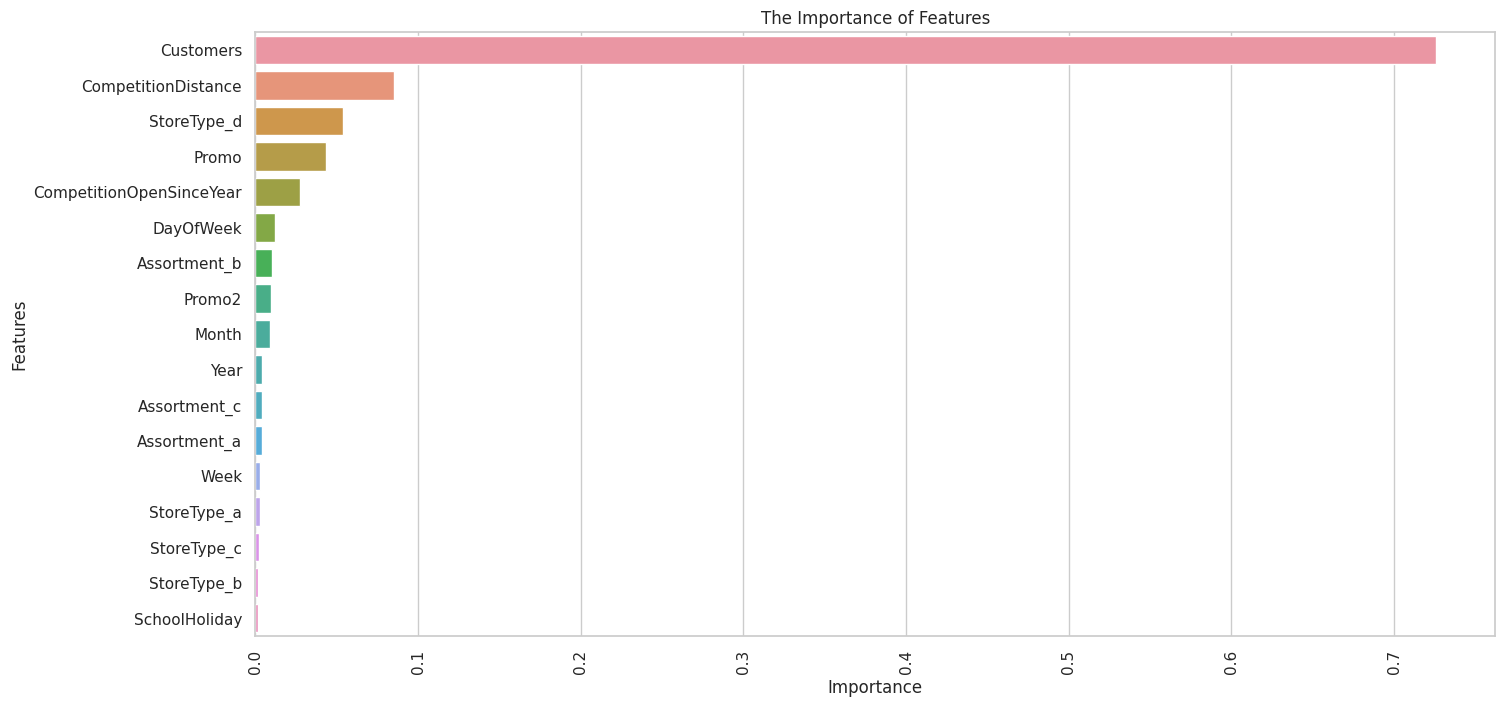

In [147]:
# Feature Importnace through barplot

Features = df_feature_imp.index
plt.figure(figsize = (16,8))
sns.barplot( x = df_feature_imp['Importance'], y = Features, data = df_feature_imp)
plt.title('The Importance of Features')
plt.xticks(rotation = 90)
plt.show()


# 8. Calculation of Train Score and Test Score

Let's calculate train score and test score of different regression models.

In [148]:
# Calculation of train and test score on the basis train set and test set respectively for Linear Regression Model
train_score_LR = lin_reg.score(X_train, y_train)
test_score_LR = lin_reg.score(X_test, y_test)

In [149]:
# Calculation of train and test score on the basis train set and test set respectively for Lasso Regression Model
train_score_Lasso = lasso_regressor.score(X_train, y_train)
test_score_Lasso = lasso_regressor.score(X_test, y_test)

In [150]:
# Calculation of train and test score on the basis train set and test set respectively for Ridge Regression Model
train_score_Ridge = ridge.score(X_train, y_train)
test_score_Ridge = ridge.score(X_test, y_test)

In [151]:
# Calculation of train and test score on the basis train set and test set respectively for Elastic Net Regression Model
train_score_ENR = elastic.score(X_train, y_train)
test_score_ENR = elastic.score(X_test, y_test)

In [152]:
# Calculation of train and test score on the basis train set and test set respectively for Decision Tree Regression Model
train_score_DT = decision_tree_reg.score(X_train, y_train)
test_score_DT = decision_tree_reg.score(X_test, y_test)

In [153]:
# Calculation of train and test score on the basis train set and test set respectively for Random Forest Regression Model
train_score_RFM = random_forest_model.score(X_train, y_train)
test_score_RFM = random_forest_model.score(X_test, y_test)

In [154]:
# Calculation of train and test score on the basis train set and test set respectively for XGBoost Regression Model
train_score_XGB = xgb.score(X_train, y_train)
test_score_XGB = xgb.score(X_test, y_test)

In [155]:
# Calculation of train and test score on the basis train set and test set respectively for AdaBoost Regression Model
train_score_ADBR = adbr.score(X_train, y_train)
test_score_ADBR = adbr.score(X_test, y_test)

In [156]:
# Calculation of train and test score on the basis train set and test set respectively for GradientBoost Regression Model
train_score_GBR = gbr.score(X_train, y_train)
test_score_GBR = gbr.score(X_test, y_test)

In [157]:
# Gathering all train scores and test scores in a dataframe

df_score = pd.DataFrame({'Train Score' : [train_score_LR, train_score_Lasso, train_score_Ridge, train_score_ENR, train_score_DT, train_score_RFM, train_score_XGB, train_score_ADBR, train_score_GBR],
                          'Test Score' : [test_score_LR, test_score_Lasso, test_score_Ridge, test_score_ENR, test_score_DT, test_score_RFM, test_score_XGB, test_score_ADBR, test_score_GBR]})


In [158]:
# New dataframe of gathered train and test score
df_score

Train Score  Test Score
0     0.827401    0.826999
1    -0.133399   -0.133813
2     0.827401    0.826999
3     0.682728    0.682691
4     0.999996    0.941723
5     0.995573    0.969784
6     0.374075    0.373643
7     0.773454    0.773134
8     0.872664    0.872328

# 9. Conclusion:

Here we come at the fag end almost. And this is the conclusive part.
From those above observations it can be concluded that

* Most important features are Customers, CompetitionDistance, StoreType_d, Promo, CompetitionOpenSinceYear, DayOfWeek.
* Out of these methods, Random Forest proved to be the most accurate, achieving a R2_Score of 0.968566, MAE of 2.0359620872115216. MSE of 7.6529574439377015 and RMSE of 2.7663979185825203. While it has the lowest error of all methods, it requires more work than the other three approaches and hence, consumes more time to produce results.
* The results of all predictions may be skewed due to data preprocessing, as the training set contains a large portion of incomplete entries that had to be filled with most fitting values.
* Therefore, it can be said that the implementation of Random Forest model should be improvised and Rossmann store managers should utilize the feature importance data for predicting the sales for next six months. 

# 10. References :

1. https://en.wikipedia.org/wiki/Linearity#:~:text=Linearity%20is%20the%20property%20of,is%20closely%20related%20to%20proportionality

2. https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/

3. https://www.investopedia.com/terms/c/correlation.asp

4. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea#:~:text=Multicollinearity%20happens%20when%20independent%20variables,variables%20into%20the%20regression%20model

5. https://corporatefinanceinstitute.com/resources/excel/correlation-matrix/

6. https://www.geeksforgeeks.org/ml-linear-regression/

7. https://statisticsbyjim.com/glossary/residuals/

8. https://www.geeksforgeeks.org/cross-validation-machine-learning/

9. https://www.geeksforgeeks.org/regularization-in-machine-learning/

10. https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

11. https://analyticsindiamag.com/hands-on-tutorial-on-elasticnet-regression/

12. https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

13. https://www.geeksforgeeks.org/random-forest-regression-in-python/

14. https://www.geeksforgeeks.org/xgboost-for-regression/

15. https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/

16. https://www.geeksforgeeks.org/ml-gradient-boosting/
